#  <b>Limited Proteolysis of HeLa Cell Lysates by Tyler T. Cooper, PhD</b>

### Libraries

In [1]:
### Data Handling
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from scipy.stats import pearsonr
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
from itertools import combinations
import re
import Peptide_Chef as Chef
from pyteomics import parser, electrochem
#

#Statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Figure Generation
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import offsetbox
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d import axes3d
from IPython.display import Image, display
import seaborn as sns
from adjustText import adjust_text
import glob

#Venn Diagrams
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

cmap = 'PRGn'
fmt='eps'
dpi=600

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.1.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# <b>Section 1: Analysis of Peptides</b>

In [3]:
og_pep=Chef.PEAKS_Importer("protein-peptides_1in50only.csv")
og_pep

,Protein Group,Protein ID,Peptide,Unique,Score (%),-10lgP,Mass,Length,ppm,m/z,z,RT,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,Area Tryp_18hr_1:50_Rep1,Area AspN_1hr_1:50_Rep1,Area AspN_1hr_1:50_Rep2,Area AspN_18hr_1:50_Rep1,Area AspN_18hr_1:50_Rep2,Area GluC_1hr_1:50_Rep1,Area GluC_1hr_1:50_Rep2,Area GluC_18hr_1:50_Rep1,Area GluC_18hr_1:50_Rep2,Area Trypsin_18hr_1:50_Rep2,Fraction,Scan,Source File,#Feature,#Feature Tryp_1hr_1:50_Rep1,#Feature Tryp_1hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature AspN_1hr_1:50_Rep1,#Feature AspN_1hr_1:50_Rep2,#Feature AspN_18hr_1:50_Rep1,#Feature AspN_18hr_1:50_Rep2,#Feature GluC_1hr_1:50_Rep1,#Feature GluC_1hr_1:50_Rep2,#Feature GluC_18hr_1:50_Rep1,#Feature GluC_18hr_1:50_Rep2,#Feature Trypsin_18hr_1:50_Rep2,Start,End,PTM,AScore,Protein,Gene,Species
0,1,42,L.DKKVEKVTISNRLVSSPC(+57.02)C(+57.02)IVTSTYGWT...,Y,100.0,125.61,4741.4175,41,1.4,949.2921,5,215.58,NaN,NaN,NaN,26069000.0,NaN,83391000.0,NaN,NaN,NaN,NaN,NaN,NaN,6,F6:114936,tc_28Oct2020_18hrAspN1in50_HeLa_500ng_290minTC...,6,0,0,0,3,0,3,0,0,0,0,0,0,572,612,Carbamidomethylation; Deamidation (NQ),C18:Carbamidomethylation:1000.00;C19:Carbamido...,P08238,HS90B,HUMAN
1,1,42,L.DKKVEKVTISNRLVSSPC(+57.02)C(+57.02)IVTSTYGWT...,Y,100.0,121.69,4740.4336,41,-1.3,791.0785,6,213.93,NaN,NaN,NaN,339740000.0,563730000.0,303560000.0,183390000.0,NaN,NaN,NaN,NaN,NaN,4,F4:107863,tc_26Oct2020_1hrAspN1in50_HeLa_500ng_290minTC_...,15,0,0,0,3,5,3,4,0,0,0,0,0,572,612,Carbamidomethylation,C18:Carbamidomethylation:1000.00;C19:Carbamido...,P08238,HS90B,HUMAN
2,1,42,M.PEEVHHGEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELIS...,Y,100.0,116.27,5422.6704,47,-0.5,1085.5408,5,250.64,NaN,NaN,NaN,3723800.0,849160.0,3638700.0,1030200.0,NaN,NaN,NaN,NaN,NaN,5,F5:131414,tc_15Nov2020_1hrAspN1in50_HeLa_500ng_290min_Re...,6,0,0,0,2,1,2,1,0,0,0,0,0,2,48,NaN,NaN,P08238,HS90B,HUMAN
3,1,42,R.DNSTMGYMMAKKHLEINPDHPIVETLRQ(+.98)KAEA.D,Y,100.0,112.41,3667.7795,32,-0.1,917.9521,4,149.94,NaN,NaN,NaN,196410000.0,NaN,297640000.0,NaN,NaN,NaN,NaN,NaN,NaN,6,F6:80159,tc_28Oct2020_18hrAspN1in50_HeLa_500ng_290minTC...,5,0,0,0,3,0,2,0,0,0,0,0,0,613,644,Deamidation (NQ),Q28:Deamidation (NQ):115.60,P08238,HS90B,HUMAN
4,1,42,K.HNDDEQYAWESSAGGSFTVR.A,N,100.0,111.18,2254.9514,20,0.4,1128.4834,2,136.17,1.180000e+09,1.176400e+09,2.468800e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884260000.0,23,F23:73418,tc_16Nov2020_18hrTryp1in50_HeLa_500ng_290min_R...,57,17,17,13,0,0,0,0,0,0,0,0,10,149,168,NaN,NaN,P08238,HS90B,HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144286,5255,5322,E.NIARLLFQE.D,Y,96.3,27.39,1102.6134,9,-11.5,552.3076,2,152.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7847500.0,NaN,11,F11:77227,tc_16Nov2020_18hrGluC1in50_HeLa_500ng_290min_R...,1,0,0,0,0,0,0,0,0,0,0,1,0,1359,1367,NaN,NaN,Q9P2D7,DYH1,HUMAN
144287,5786,5276,E.KNILPVDSSVKE.A,Y,95.2,27.38,1327.7347,12,-0.6,443.5852,3,80.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2076900.0,NaN,NaN,NaN,NaN,8,F8:37966,tc_27Oct2020_1hrGluC1in50_HeLa_500ng_290minTC_...,1,0,0,0,0,0,0,0,1,0,0,0,0,146,157,NaN,NaN,Q9ULH7,MRTFB,HUMAN
144288,5635,6094,E.RSGPLASPVLLE.T,Y,94.9,27.36,1237.7030,12,0.7,619.8592,2,136.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1734800.0,NaN,NaN,10,F10:73024,tc_27Oct2020_18hrGluC1in50_HeLa_500ng_290minTC...,1,0,0,0,0,0,0,0,0,0,1,0,0,1458,1469,NaN,NaN,Q9UPS6,SET1B,HUMAN
144289,5488,6047,MKVTVC(+57.02)FGRTRVVVPC(+57.02)GDGHM(+15.99)K...,Y,93.4,27.36,4622.4697,40,17.7,771.4325,6,226.56,NaN,NaN,NaN,NaN,5612400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,F5:119307,tc_15Nov2020_1hrAspN1in50_HeLa_500ng_290min_Re...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,40,Carbamidomethylation; Oxidation (M),C6:Carbamidomethylation:1000.00;C16:Carbamidom...,Q8TEW0,PARD3,HUMAN


## Global Variables

In [4]:
og_mz=og_pep[['Protein ID','Protein', 'Peptide','Gene','Mass','RT','Score (%)','m/z','z','Length']]


In [5]:
peanut=['Protein ID','Protein', 'Peptide','Gene','Mass','RT','Score (%)','m/z','z','Length']

In [6]:
rulers=["Mass","RT","m/z","z","Peptide","Length","Hydro_Sum","IPC","Neutral_Z"]

## Correlation of Peptide Variables - Whole Data Set

In [7]:
# og_corr=og_pep[['Mass','RT','Score (%)','m/z','z','Length','IPC','Neutral_Z', 'Hydro_Sum','Hydro_Sum_Norm']]

In [8]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(og_corr.corr(), dtype=np.bool))
# heatmap = sns.heatmap(og_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PRGn')
# heatmap.set_title('Correlation Heatmap of Peptide Characteristics', fontdict={'fontsize':18}, pad=16);
# plt.savefig('Correlation_Heatmap',format=fmt,dpi=dpi,bbox_inches="tight")

In [9]:
def Butcher(df,ident1=None,ident2=None,ident3=None,t_id=None,t_value=0,acid=["J","Z"],labels=list(),excel_mapper=True,excel_name=None):
    tag=df[labels]
    raw= df.filter(like=str(ident1), axis=1)
    raw = pd.concat([raw, tag], axis=1)
    if ident3 == None:
        cuts = raw.filter(like=str(ident2), axis=1)
    else:
        cutsT = raw.filter(like=str(ident2), axis=1)
        cuts = cutsT.filter(like=str(ident3), axis=1)
    cuts = pd.concat([cuts,tag], axis=1)
    #Clean Peptides, Removing Numbers and Symbols, removing first amino acid if enzyme cleaves at C-terminal
    cuts["Peptide"]= cuts["Peptide"].str.replace('\W+|\d+',"")
    cuts["Peptide"]= cuts["Peptide"].apply(lambda x : x[1:] if x.startswith(tuple(acid)) else x)
    cuts=cuts.fillna(0)
    blade=cuts.filter(regex=t_id, axis='columns')
    trim=blade==t_value
    trimmings=trim.all(axis=1)
    cuts=cuts.loc[~trimmings,:]
    cuts.reset_index(inplace=True)
    cuts.drop('index', axis=1, inplace=True)
#     excels=[raw,cuts]
#     Excel_Mapper(excels,excel_name +".xlsx")
    return raw, cuts, blade

## <b>Trypsin Peptide Analyses</b>

### Trypsin 1hr DataFrame Cleaning

In [10]:
# Selection of 1hr Trypsin 
x="Tryp"
y="1hr"
acid=["L","K"]
excel_name="Tryp1hr_50_peptides"
Tryp, T1_50_pep,blade=Butcher(og_pep,ident1=x,ident2=y,ident3=None,t_id="^Area",t_value=0,
                  acid=acid,labels=peanut,excel_name=excel_name)

# Add IPC, Hydro, GRAVY, NeutralZ
Chef.Marinate(T1_50_pep,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True)

# #Split Replicates
# Tryp1_50_Rep1=Tryp1_50_pep.loc[(Tryp1_50['Area Tryp_1hr_1:50_Rep1'] > 0)]
# Tryp1_50_Rep2=Tryp1_50_pep.loc[(Tryp1_50['Area Tryp_1hr_1:50_Rep2'] > 0)]

# #Copy Dataframe for Cross-Protein Analysis


Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Feature Tryp_1hr_1:50_Rep1,#Feature Tryp_1hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
0,1.180000e+09,1.176400e+09,17,17,42,P08238,HNDDEQYAWESSAGGSFTVRA,HS90B,2254.9514,136.17,100.0,1128.4834,2,20,4.100537,-1.066667,-3.0
1,1.432000e+09,2.016000e+09,6,5,42,P08238,RYHTSQSGDEMTSLSEYVSRM,HS90B,2175.9377,127.21,100.0,1088.9771,2,19,5.384736,-1.085714,-1.0
2,2.262100e+09,3.040500e+09,13,23,42,P08238,VILHLKEDQTEYLEERR,HS90B,2014.0371,113.76,100.0,1008.0255,2,16,4.825283,-1.117647,-2.0
3,2.261400e+09,2.755000e+09,6,3,42,P08238,HLEINPDHPIVETLRQ,HS90B,1781.9424,122.25,100.0,446.4927,4,15,5.219443,-0.718750,-2.0
4,0.000000e+00,4.366200e+06,0,2,42,P08238,MPEEVHHGEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRE,HS90B,4708.3159,250.54,99.9,1178.0920,4,40,4.214971,-0.200000,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48150,0.000000e+00,5.101500e+06,0,1,10868,Q9NQ69,TLTTGDHFGMKDSLVYCRA,LHX9,2099.9768,134.32,97.2,526.0063,4,18,7.146357,-0.147368,0.0
48151,0.000000e+00,5.004300e+05,0,1,15608,Q6NW34,INVQNNVDLGQPVKN,NEPRO,1536.8259,94.88,97.1,769.4198,2,14,6.707490,-0.633333,0.0
48152,2.150400e+05,0.000000e+00,1,0,8222,Q9UK58,RILGCELIQAAGILLRL,CCNL1,1638.9491,240.22,96.8,547.3246,3,15,8.931084,1.282353,1.0
48153,0.000000e+00,2.212300e+06,0,1,11575,Q96Q83,RTVYPDPRG,ALKB3,846.4235,56.83,97.0,424.2243,2,7,9.808818,-1.544444,1.0


In [11]:
T1_50_pep.loc[T1_50_pep.Protein == "P35232"].describe()

,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Feature Tryp_1hr_1:50_Rep1,#Feature Tryp_1hr_1:50_Rep2,Protein ID,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
count,3.300000e+01,3.300000e+01,33.000000,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3.512809e+07,4.649146e+07,0.939394,0.848485,161.0,1816.264967,147.711212,99.787879,687.093661,2.575758,16.727273,7.240337,-0.174889,0.030303
std,6.215921e+07,7.340288e+07,0.747470,0.712444,0.0,808.667304,74.521170,0.337044,158.953396,0.751262,7.993250,2.754122,0.664709,1.446652
min,0.000000e+00,0.000000e+00,0.000000,0.000000,161.0,913.523300,31.680000,98.400000,457.768400,2.000000,9.000000,4.024248,-1.433333,-2.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,161.0,1185.635400,111.220000,99.900000,575.791000,2.000000,10.000000,4.494697,-0.768750,-1.000000
50%,5.213200e+06,5.580200e+06,1.000000,1.000000,161.0,1443.651700,150.320000,99.900000,666.701500,2.000000,12.000000,7.058584,0.145455,0.000000
75%,2.947000e+07,5.700300e+07,1.000000,1.000000,161.0,2370.244400,223.760000,99.900000,791.088900,3.000000,24.000000,10.042881,0.312500,1.000000
max,2.194800e+08,2.962500e+08,3.000000,2.000000,161.0,3425.806900,237.380000,100.000000,1014.538500,4.000000,32.000000,12.807744,0.796000,3.000000


### Trypsin 18hr DataFrame Cleaning

In [12]:
# Selection of 1hr Trypsin 
x="Tryp"
y="18hr"
acid=["L","K"]
excel_name="Tryp18hr_50_peptides"
Tryp, T18_50_pep,blade=Butcher(og_pep,ident1=x,ident2=y,ident3=None,t_id="^Area",t_value=0,
                  acid=acid,labels=peanut,excel_name=excel_name)

# Add IPC, Hydro, GRAVY, NeutralZ
Chef.Marinate(T18_50_pep,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True)

# #Split Replicates
# Tryp18_50_Rep1=Tryp18_50_pep.loc[(Tryp1_50['Area Tryp_1hr_1:50_Rep1'] > 0)]
# Tryp18_50_Rep2=Tryp18_50_pep.loc[(Tryp1_50['Area Tryp_1hr_1:50_Rep2'] > 0)]

# #Copy Dataframe for Cross-Protein Analysis



Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature Trypsin_18hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
0,2.468800e+09,8.842600e+08,13,10,42,P08238,HNDDEQYAWESSAGGSFTVRA,HS90B,2254.9514,136.17,100.0,1128.4834,2,20,4.100537,-1.066667,-3.0
1,2.841200e+09,1.523500e+09,4,3,42,P08238,RYHTSQSGDEMTSLSEYVSRM,HS90B,2175.9377,127.21,100.0,1088.9771,2,19,5.384736,-1.085714,-1.0
2,4.317500e+08,7.829100e+08,3,5,42,P08238,VILHLKEDQTEYLEERR,HS90B,2014.0371,113.76,100.0,1008.0255,2,16,4.825283,-1.117647,-2.0
3,7.493500e+09,2.474600e+09,7,3,42,P08238,HLEINPDHPIVETLRQ,HS90B,1781.9424,122.25,100.0,446.4927,4,15,5.219443,-0.718750,-2.0
4,5.126700e+09,1.772300e+09,4,3,42,P08238,KHLEINPDHPIVETLRQ,HS90B,1910.0374,103.62,100.0,637.6861,3,16,6.058623,-0.905882,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45802,0.000000e+00,2.635300e+06,0,1,12999,Q9BWU1,RAPELLLGARH,CDK19,938.5549,108.99,97.1,470.2853,2,9,10.876729,-0.245455,1.0
45803,0.000000e+00,7.402100e+05,0,1,6444,Q9BZ95,EQVETVPQATVKT,NSD3,1327.6984,55.75,97.1,664.8586,2,12,4.329404,-0.553846,-1.0
45804,0.000000e+00,3.988000e+06,0,1,13645,P34903,VPEALEMKK,GBRA3,915.4735,102.74,97.1,458.7496,2,8,7.043955,-0.522222,0.0
45805,1.059000e+06,0.000000e+00,1,0,15722,O60427,VAPLVQSLCAKH,FADS1,1184.6587,96.42,96.7,593.3364,2,11,8.901826,0.758333,1.0


In [13]:
T18_50_pep

,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature Trypsin_18hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
0,2.468800e+09,8.842600e+08,13,10,42,P08238,HNDDEQYAWESSAGGSFTVRA,HS90B,2254.9514,136.17,100.0,1128.4834,2,20,4.100537,-1.066667,-3.0
1,2.841200e+09,1.523500e+09,4,3,42,P08238,RYHTSQSGDEMTSLSEYVSRM,HS90B,2175.9377,127.21,100.0,1088.9771,2,19,5.384736,-1.085714,-1.0
2,4.317500e+08,7.829100e+08,3,5,42,P08238,VILHLKEDQTEYLEERR,HS90B,2014.0371,113.76,100.0,1008.0255,2,16,4.825283,-1.117647,-2.0
3,7.493500e+09,2.474600e+09,7,3,42,P08238,HLEINPDHPIVETLRQ,HS90B,1781.9424,122.25,100.0,446.4927,4,15,5.219443,-0.718750,-2.0
4,5.126700e+09,1.772300e+09,4,3,42,P08238,KHLEINPDHPIVETLRQ,HS90B,1910.0374,103.62,100.0,637.6861,3,16,6.058623,-0.905882,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45802,0.000000e+00,2.635300e+06,0,1,12999,Q9BWU1,RAPELLLGARH,CDK19,938.5549,108.99,97.1,470.2853,2,9,10.876729,-0.245455,1.0
45803,0.000000e+00,7.402100e+05,0,1,6444,Q9BZ95,EQVETVPQATVKT,NSD3,1327.6984,55.75,97.1,664.8586,2,12,4.329404,-0.553846,-1.0
45804,0.000000e+00,3.988000e+06,0,1,13645,P34903,VPEALEMKK,GBRA3,915.4735,102.74,97.1,458.7496,2,8,7.043955,-0.522222,0.0
45805,1.059000e+06,0.000000e+00,1,0,15722,O60427,VAPLVQSLCAKH,FADS1,1184.6587,96.42,96.7,593.3364,2,11,8.901826,0.758333,1.0


In [14]:
chicken,pot, pie = Chef.Wishbone(T1_50_pep, "Gene",split=1)

The number of proteins with > 1 peptides : 3238.0
Ratio of Proteins with > 1 Peptides Identified: 82.266


In [15]:
chicken,pot,pie = Chef.Wishbone(T18_50_pep, "Gene",split=1)

The number of proteins with > 1 peptides : 3456.0
Ratio of Proteins with > 1 Peptides Identified: 82.266


### ICE LOGO for Trypsin

In [16]:
# def Peptide_ICEmaker(peptide,excel_name="Test",freeze_it=0,cut_it=6):
#     ice=peptide.str.slice(freeze_it,cut_it)
#     ice_ice = ice.str.slice(freeze_it,cut_it)
#     ice_ice.to_excel('ICE '+excel_name+".xlsx")
#     return ice_ice

In [17]:
# T1_ice=Peptide_ICEmaker(peptide=Tryp1_50["Peptide"],excel_name="Trypsin_1hr")

In [18]:
# T18_ice=Peptide_ICEmaker(peptide=Tryp18_50["Peptide"],excel_name="Trypsin_18hr")

### Peptide Comparisons

In [19]:
def Sweet_N_Sour(set1,set2):
    common_IDs=list(set(set1)&set(set2))
    common=len(common_IDs)
    unique=len(list(set(set1)^set(set2)))
    unique_set1=list(set(set1)-set(set2))
    unique_set2=list(set(set2)-set(set1))
    set1_count=len(unique_set1)
    set2_count=len(unique_set2)
    Ratio=(unique/(common+unique))*100
    print(f"The number of common peptides is: %.3f" % common)
    print(f"The number of unique peptides in set1 is: %.3f" % set1_count)
    print(f"The number of unique peptides in set1 is: %.3f" % set2_count)
    print(f"The Ratio of Unique to Common peptides is: %.3f" % Ratio)
    return common_IDs,unique_set1, unique_set2

In [20]:
Tryp_Common,Unique_T1,Unique_T18=Sweet_N_Sour(T1_50_pep.Peptide,T18_50_pep.Peptide)

The number of common peptides is: 22886.000
The number of unique peptides in set1 is: 14784.000
The number of unique peptides in set1 is: 12427.000
The Ratio of Unique to Common peptides is: 54.317


### Figures for 1hr Trypsin Peptides

### Figures for 18hr Trypsin Peptides

## <b> AspN Peptide Analyses </b>

In [21]:
# Selection of 1hr Trypsin 
x="AspN"
y="1hr"
acid=['A', 'R', 'N','D', 'C', 'Q','E', 'G', 'H',
             'I', 'L', 'K', 'F', 'P',
             'S', 'T', 'W','Y', 'V']
excel_name="AspN1hr_50_peptides"
AspN, A1_50_pep,blade=Butcher(og_pep,ident1=x,ident2=y,ident3=None,t_id="^Area",t_value=0,
                  acid=acid,labels=peanut,excel_name=excel_name)

# Add IPC, Hydro, GRAVY, NeutralZ
Chef.Marinate(A1_50_pep,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True)

# Selection of 1hr Trypsin 
x="AspN"
y="18hr"
acid=['A', 'R', 'N','D', 'C', 'Q','E', 'G', 'H',
             'I', 'L', 'K', 'F', 'P',
             'S', 'T', 'W','Y', 'V']
excel_name="AspN18hr_50_peptides"
AspN, A18_50_pep,blade=Butcher(og_pep,ident1=x,ident2=y,ident3=None,t_id="^Area",t_value=0,
                  acid=acid,labels=peanut,excel_name=excel_name)

# Add IPC, Hydro, GRAVY, NeutralZ
Chef.Marinate(A18_50_pep,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True)


Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!
Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,Area AspN_18hr_1:50_Rep1,Area AspN_18hr_1:50_Rep2,#Feature AspN_18hr_1:50_Rep1,#Feature AspN_18hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
0,83391000.0,0.0,3,0,42,P08238,DKKVEKVTISNRLVSSPCCIVTSTYGWTANMERIMKAQALRD,HS90B,4741.4175,215.58,100.0,949.2921,5,41,9.545498,-0.278571,3.0
1,303560000.0,183390000.0,3,4,42,P08238,DKKVEKVTISNRLVSSPCCIVTSTYGWTANMERIMKAQALRD,HS90B,4740.4336,213.93,100.0,791.0785,6,41,9.545498,-0.278571,3.0
2,3638700.0,1030200.0,2,1,42,P08238,MPEEVHHGEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNASD,HS90B,5422.6704,250.64,100.0,1085.5408,5,47,4.100537,-0.140816,-8.0
3,297640000.0,0.0,2,0,42,P08238,DNSTMGYMMAKKHLEINPDHPIVETLRQKAEAD,HS90B,3667.7795,149.94,100.0,917.9521,4,32,5.346592,-0.887879,-2.0
4,52216000.0,0.0,2,0,42,P08238,DQEELNKTKPIWTRNPDDITQEEYGEFYKSLTND,HS90B,4001.8806,192.12,100.0,1001.4797,4,33,4.024248,-1.661765,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,22570000.0,0.0,1,0,8888,Q8NDA2,DLEEVIKVLD,HMCN2,1056.6067,173.41,94.7,529.3110,2,9,3.630088,0.260000,-3.0
23842,0.0,818120.0,0,1,13207,Q13275,DAAIFRTLGKQTAMRTD,SEM3F,1795.9250,149.27,90.9,449.9905,4,16,10.028252,-0.441176,1.0
23843,0.0,8995400.0,0,1,14487,Q8TF65,DVLELYMGIRD,GIPC2,1207.6271,75.00,90.8,403.5512,3,10,3.744521,0.136364,-2.0
23844,0.0,15279000.0,0,1,6226,Q07889,DKVLMDMFHQD,SOS1,1262.5787,86.84,90.6,421.8638,3,10,4.189541,-0.590909,-2.0


In [22]:
chicken,pot, pie = Chef.Wishbone(A1_50_pep, "Gene", split=1)

The number of proteins with > 1 peptides : 2601.0
Ratio of Proteins with > 1 Peptides Identified: 73.185


In [23]:
chicken,pot, pie = Chef.Wishbone(A18_50_pep, "Gene",split=1)

The number of proteins with > 1 peptides : 2360.0
Ratio of Proteins with > 1 Peptides Identified: 72.840


In [24]:
x,y,z=Sweet_N_Sour(A1_50_pep.Peptide,A18_50_pep.Peptide)

The number of common peptides is: 12187.000
The number of unique peptides in set1 is: 6630.000
The number of unique peptides in set1 is: 3643.000
The Ratio of Unique to Common peptides is: 45.739


### ICE LOGO for AspN

In [25]:
# A1_ice=Peptide_ICEmaker(peptide=AspN1_50["Peptide"],excel_name="AspN_1hr")

In [26]:
# A18_ice=Peptide_ICEmaker(peptide=AspN18_50["Peptide"],excel_name="AspN_1hr")

### Figures for AspN 1hr

### Figures for AspN 18hr

## <b>GluC Peptide Analyses </b>

In [27]:
# Selection of 1hr Trypsin 
x="GluC"
y="1hr"
acid=['E']
excel_name="GluC1hr_50_peptides"
GluC, G1_50_pep,blade=Butcher(og_pep,ident1=x,ident2=y,ident3=None,t_id="^Area",t_value=0,
                  acid=acid,labels=peanut,excel_name=excel_name)

# Add IPC, Hydro, GRAVY, NeutralZ
Chef.Marinate(G1_50_pep,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True)

# Selection of 1hr Trypsin 
x="GluC"
y="18hr"
acid=['E']
excel_name="GluC18hr_50_peptides"
GluC, G18_50_pep,blade=Butcher(og_pep,ident1=x,ident2=y,ident3=None,t_id="^Area",t_value=0,
                  acid=acid,labels=peanut,excel_name=excel_name)

# Add IPC, Hydro, GRAVY, NeutralZ
Chef.Marinate(G18_50_pep,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True)


Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!
Marinating peptides...
IPC calculated!
Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,Area GluC_18hr_1:50_Rep1,Area GluC_18hr_1:50_Rep2,#Feature GluC_18hr_1:50_Rep1,#Feature GluC_18hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
0,6.124800e+08,153670000.0,4,4,42,P08238,RIMKAQALRDNSTMGYMMAKKHLEI,HS90B,2822.4175,98.00,99.9,565.4911,5,24,10.452490,-0.460000,3.0
1,1.312100e+08,40447000.0,2,4,42,P08238,RIMKAQALRDNSTMGYMMAKKHLEI,HS90B,2823.4016,103.96,99.9,565.6885,5,24,10.452490,-0.460000,3.0
2,1.006200e+09,941500000.0,2,9,42,P08238,LISNASDALDKIRYES,HS90B,1706.8839,130.74,99.9,854.4487,2,15,4.354834,-0.368750,-1.0
3,3.283500e+08,105530000.0,3,8,42,P08238,FYKSLTNDWEDHLAVKHFSVEG,HS90B,2564.2336,163.36,99.9,642.0662,4,21,5.257588,-0.600000,-2.0
4,1.401900e+08,98663000.0,1,8,42,P08238,KVTISNRLVSSPCCIVTSTYGWTANMER,HS90B,3073.4670,195.49,99.9,1025.4990,3,27,9.004229,0.017857,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26775,0.000000e+00,3165900.0,0,1,9329,Q8NEG4,VEFLTGKRPNEN,FA83F,1288.6775,139.47,96.5,645.3449,2,11,7.073213,-1.191667,0.0
26776,0.000000e+00,2794300.0,0,1,6980,Q9BTY2,ERLRQMGSWLKVNGEA,FUCO2,1802.9097,135.39,96.3,902.4736,2,15,10.028252,-0.868750,1.0
26777,0.000000e+00,114500.0,0,1,7833,Q96PE6,WQRLNPEQ,ZIM3,942.4559,34.05,96.3,472.2277,2,7,6.941553,-2.150000,0.0
26778,0.000000e+00,7847500.0,0,1,5322,Q9P2D7,NIARLLFQED,DYH1,1102.6134,152.64,96.3,552.3076,2,9,4.113252,-0.180000,-1.0


### ICE LOGO for GluC

### Figures for GluC 1hr

### Figures for GluC 18hr

# Mixed Peptide Figures

In [28]:
dataframes=[T1_50_pep,T18_50_pep,A1_50_pep,A18_50_pep,G1_50_pep,G18_50_pep]
labels=["T1_pep","T18_pep","A1_pep","A18_pep","G1_pep","G18_pep"]
for df,label in zip (dataframes,labels):
    for ruler in rulers:
        if ruler != "m/z":
            x = str(label+"_"+ruler)
            globals()[str(x)]=df[ruler]
        else:
            temp = ruler
            ruler = "mz"
            x = str(label+"_"+ruler)
            globals()[str(x)]=df[temp]
T1_pep_mz

0        1128.4834
1        1088.9771
2        1008.0255
3         446.4927
4        1178.0920
           ...    
48150     526.0063
48151     769.4198
48152     547.3246
48153     424.2243
48154     725.6643
Name: m/z, Length: 48155, dtype: float64

In [29]:
T1_pep_Length

0        20
1        19
2        16
3        15
4        40
         ..
48150    18
48151    14
48152    15
48153     7
48154    22
Name: Length, Length: 48155, dtype: int64

In [30]:
### Colour Selection 
colors = {'Trypsin_18hrs':"#2A3694", 'Trypsin_1hr':"#4C72B1",'AspN_18hrs':"#9F0A2F",'AspN_1hr':"#FE0000",'GluC_18hrs':"#0F5F31",'GluC_1hr':"#119347"}

## KDE and Box Plots

#### Length

In [31]:
#Length of Peptides
x=[T1_pep_Length,T18_pep_Length,A1_pep_Length,A18_pep_Length,G1_pep_Length,G18_pep_Length]
length=pd.concat([i for i in x], axis=1)
length.columns = ['Trypsin_1hr', 'Trypsin_18hrs','AspN_1hr','AspN_18hrs','GluC_1hr','GluC_18hrs']
length

,Trypsin_1hr,Trypsin_18hrs,AspN_1hr,AspN_18hrs,GluC_1hr,GluC_18hrs
0,20,20.0,41.0,41.0,24.0,24.0
1,19,19.0,41.0,41.0,15.0,24.0
2,16,16.0,47.0,47.0,21.0,15.0
3,15,15.0,32.0,32.0,27.0,21.0
4,40,16.0,47.0,33.0,17.0,27.0
...,...,...,...,...,...,...
48150,18,NaN,NaN,NaN,NaN,NaN
48151,14,NaN,NaN,NaN,NaN,NaN
48152,15,NaN,NaN,NaN,NaN,NaN
48153,7,NaN,NaN,NaN,NaN,NaN


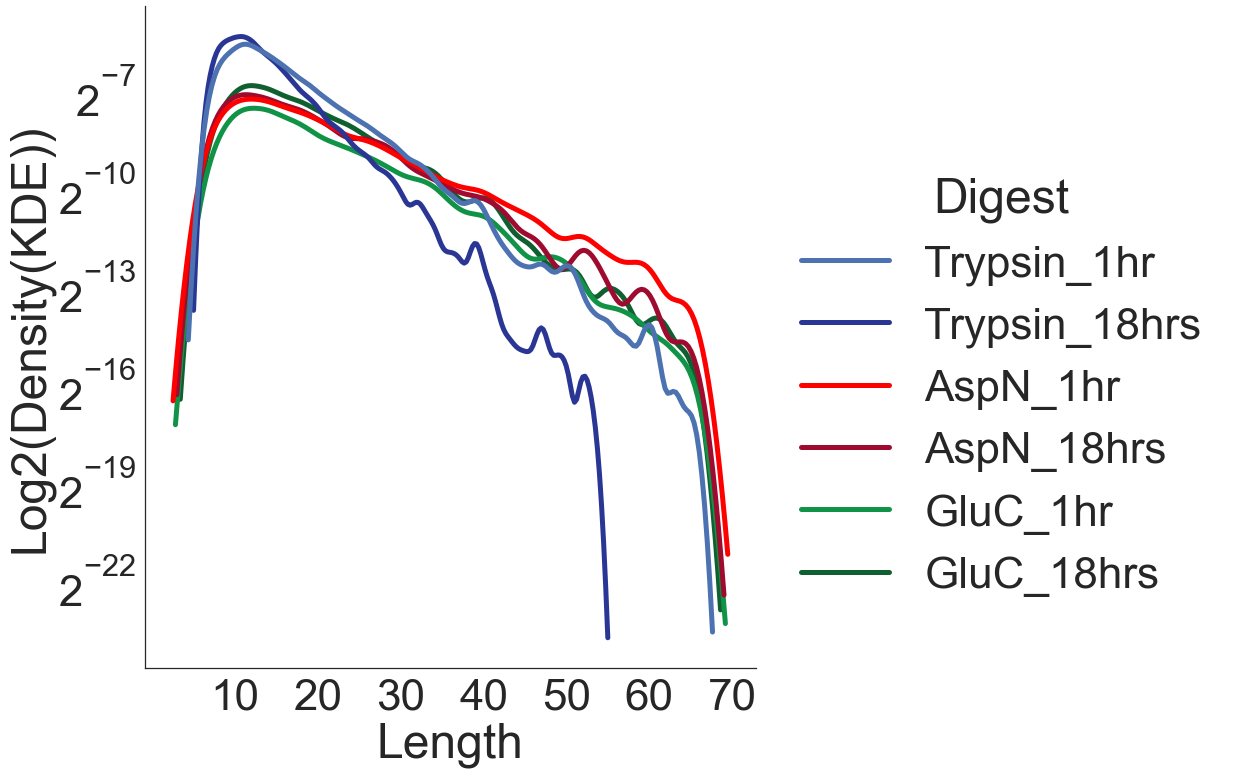

In [32]:
df1 = length.stack().reset_index()
df1.columns = ['Null','Digest','Length']
df1.drop(['Null'], axis=1, inplace=True)
df1
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Length", hue="Digest",
    kind="kde", height=12,log_scale=(0,2),palette=colors,linewidth=5  
)
plt.xticks([10,20,30,40,50,60,70])
plt.xlabel('Length', fontsize=48)
plt.ylabel('Log2(Density(KDE))', fontsize=48)
g.savefig("Length.eps")

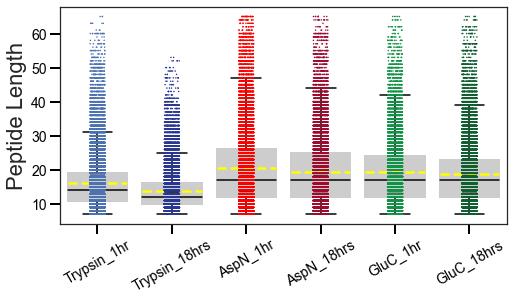

In [33]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=length,palette=colors,s=1.5)
sns.boxplot(data=length,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Peptide Length",fontsize=22)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
# plt.axhline(y=0.3, linestyle="--",color='black',linewidth=2)
# plt.axhline(y=-0.4, linestyle="--",color='black',linewidth=2)
plt.savefig('Peptide_Length',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

#### Charge

In [34]:
#Charge of Peptides
x=[T1_pep_z,T18_pep_z,A1_pep_z,A18_pep_z,G1_pep_z,G18_pep_z]
charge=pd.concat([i for i in x], axis=1)
charge.columns = ['Trypsin_1hr', 'Trypsin_18hrs','AspN_1hr','AspN_18hrs','GluC_1hr','GluC_18hrs']
charge

,Trypsin_1hr,Trypsin_18hrs,AspN_1hr,AspN_18hrs,GluC_1hr,GluC_18hrs
0,2,2.0,5.0,5.0,5.0,5.0
1,2,2.0,6.0,6.0,2.0,5.0
2,2,2.0,5.0,5.0,4.0,2.0
3,4,4.0,4.0,4.0,3.0,4.0
4,4,3.0,5.0,4.0,2.0,3.0
...,...,...,...,...,...,...
48150,4,NaN,NaN,NaN,NaN,NaN
48151,2,NaN,NaN,NaN,NaN,NaN
48152,3,NaN,NaN,NaN,NaN,NaN
48153,2,NaN,NaN,NaN,NaN,NaN


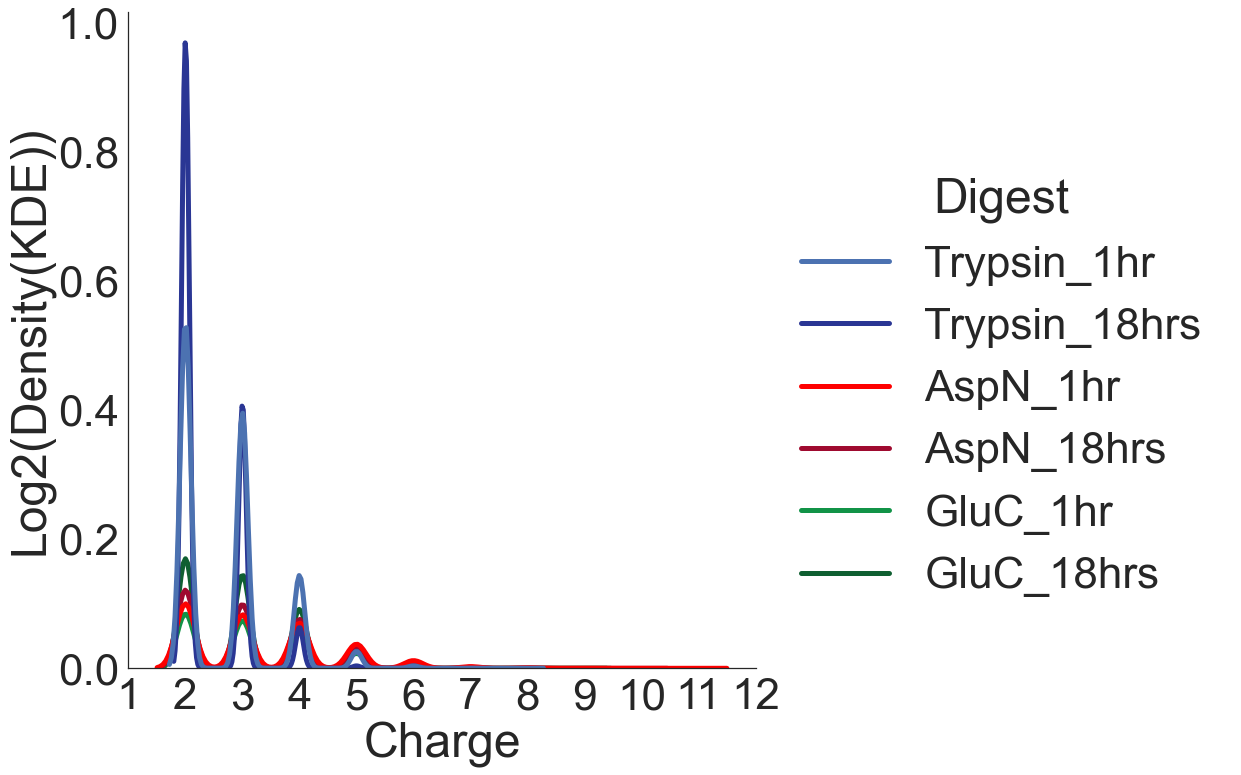

In [35]:
df1 = charge.stack().reset_index()
df1.columns = ['Null','Digest','Charge']
df1.drop(['Null'], axis=1, inplace=True)
df1
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Charge", hue="Digest",
    kind="kde", height=12,log_scale=(0,0),palette=colors,linewidth=5  
)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Charge', fontsize=48)
plt.ylabel('Log2(Density(KDE))', fontsize=48)
g.savefig("Charge.eps")

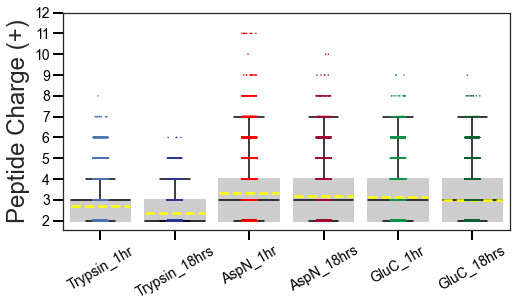

In [36]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=charge,palette=colors,s=1.5)
sns.boxplot(data=charge,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Peptide Charge (+)",fontsize=24)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(np.arange(2,13,1),fontsize=14)
# plt.axhline(y=0.3, linestyle="--",color='black',linewidth=2)
# plt.axhline(y=-0.4, linestyle="--",color='black',linewidth=2)
# plt.savefig('Peptide_Charge',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

#### Mass

In [37]:
#Mass of Peptides
x=[T1_pep_Mass,T18_pep_Mass,A1_pep_Mass,A18_pep_Mass,G1_pep_Mass,G18_pep_Mass]
Mass=pd.concat([i for i in x], axis=1)
Mass.columns = ['Trypsin_1hr', 'Trypsin_18hrs','AspN_1hr','AspN_18hrs','GluC_1hr','GluC_18hrs']
Mass

,Trypsin_1hr,Trypsin_18hrs,AspN_1hr,AspN_18hrs,GluC_1hr,GluC_18hrs
0,2254.9514,2254.9514,4741.4175,4741.4175,2822.4175,2822.4175
1,2175.9377,2175.9377,4740.4336,4740.4336,1706.8839,2823.4016
2,2014.0371,2014.0371,5422.6704,5422.6704,2564.2336,1706.8839
3,1781.9424,1781.9424,3667.7795,3667.7795,3073.4670,2564.2336
4,4708.3159,1910.0374,5423.6548,4001.8806,2073.0166,3073.4670
...,...,...,...,...,...,...
48150,2099.9768,NaN,NaN,NaN,NaN,NaN
48151,1536.8259,NaN,NaN,NaN,NaN,NaN
48152,1638.9491,NaN,NaN,NaN,NaN,NaN
48153,846.4235,NaN,NaN,NaN,NaN,NaN


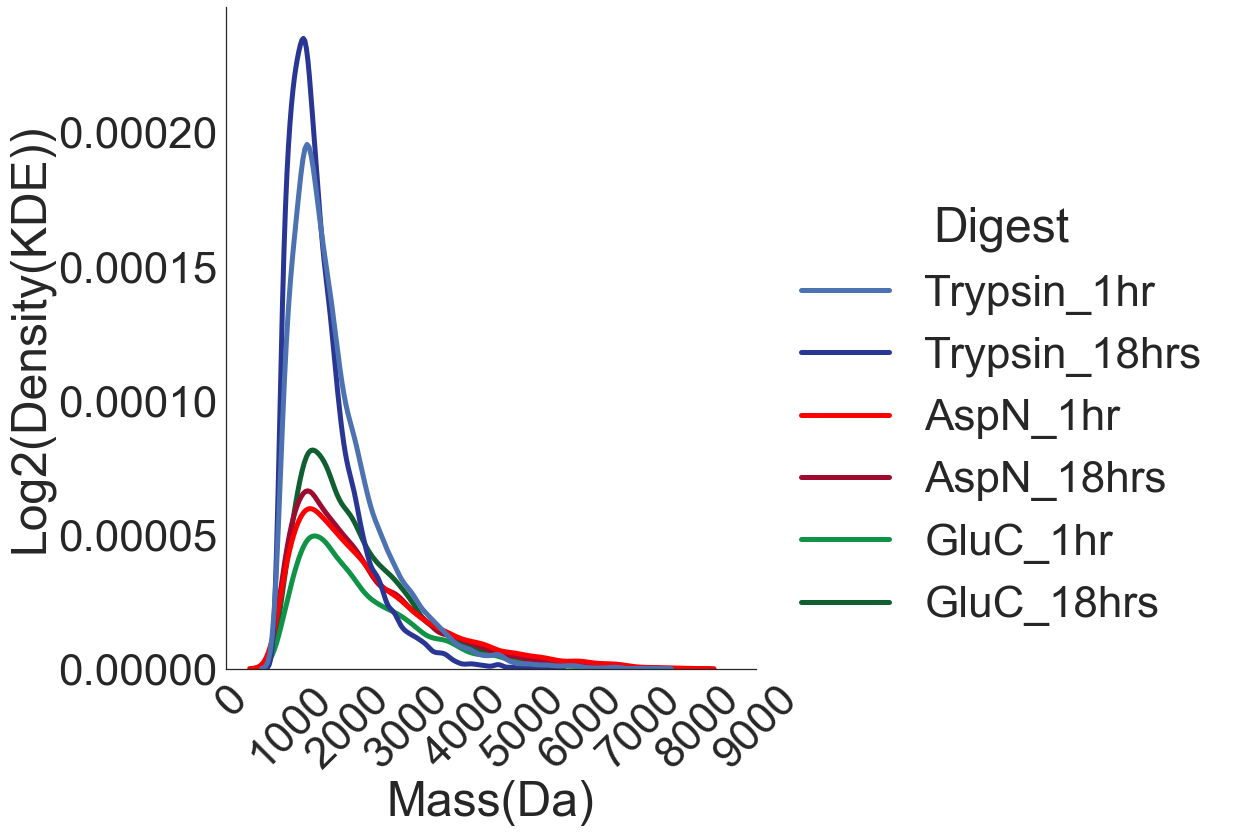

In [38]:
df1 = Mass.stack().reset_index()
df1.columns = ['Null','Digest','Mass']
df1.drop(['Null'], axis=1, inplace=True)
df1
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Mass", hue="Digest",
    kind="kde", height=12,log_scale=(0,0),palette=colors,linewidth=5  
)
plt.xticks(np.arange(0,10000,1000),rotation=45)
plt.xlabel('Mass(Da)', fontsize=48)
plt.ylabel('Log2(Density(KDE))', fontsize=48)
g.savefig("Mass.eps")

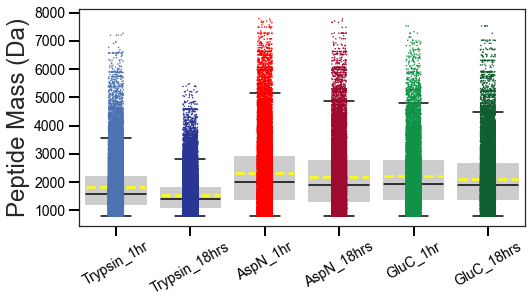

In [39]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=Mass,palette=colors,s=1.5)
sns.boxplot(data=Mass,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Peptide Mass (Da)",fontsize=24)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(np.arange(1000,9000,1000),fontsize=14)
# plt.axhline(y=0.3, linestyle="--",color='black',linewidth=2)
# plt.axhline(y=-0.4, linestyle="--",color='black',linewidth=2)
# plt.savefig('Peptide_Mass',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

#### Mass/Charge Ratio

In [40]:

#Mass of Peptides
x=[T1_pep_mz,T18_pep_mz,A1_pep_mz,A18_pep_mz,G1_pep_mz,G18_pep_mz]
mz=pd.concat([i for i in x], axis=1)
mz.columns = ['Trypsin_1hr', 'Trypsin_18hrs','AspN_1hr','AspN_18hrs','GluC_1hr','GluC_18hrs']
mz

,Trypsin_1hr,Trypsin_18hrs,AspN_1hr,AspN_18hrs,GluC_1hr,GluC_18hrs
0,1128.4834,1128.4834,949.2921,949.2921,565.4911,565.4911
1,1088.9771,1088.9771,791.0785,791.0785,854.4487,565.6885
2,1008.0255,1008.0255,1085.5408,1085.5408,642.0662,854.4487
3,446.4927,446.4927,917.9521,917.9521,1025.4990,642.0662
4,1178.0920,637.6861,1085.7463,1001.4797,1037.5146,1025.4990
...,...,...,...,...,...,...
48150,526.0063,NaN,NaN,NaN,NaN,NaN
48151,769.4198,NaN,NaN,NaN,NaN,NaN
48152,547.3246,NaN,NaN,NaN,NaN,NaN
48153,424.2243,NaN,NaN,NaN,NaN,NaN


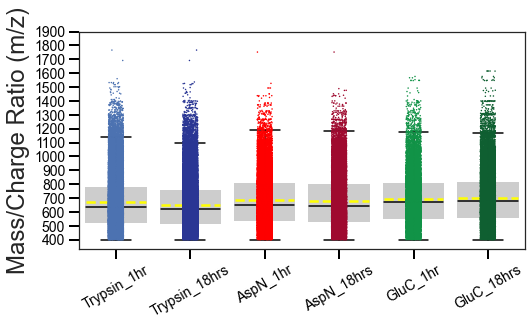

In [41]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=mz,palette=colors,s=1.5)
sns.boxplot(data=mz,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Mass/Charge Ratio (m/z)",fontsize=24)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(np.arange(400,2000,100),fontsize=14)
# plt.axhline(y=0.3, linestyle="--",color='black',linewidth=2)
# plt.axhline(y=-0.4, linestyle="--",color='black',linewidth=2)
# plt.savefig('Peptide_MassCharge',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

#### Hydrophobicity

In [42]:
#GRAVY of Peptides
x=[T1_pep_Hydro_Sum,T18_pep_Hydro_Sum,A1_pep_Hydro_Sum,A18_pep_Hydro_Sum,G1_pep_Hydro_Sum,G18_pep_Hydro_Sum]
GRAVY=pd.concat([i for i in x], axis=1)
GRAVY.columns = ['Trypsin_1hr', 'Trypsin_18hrs','AspN_1hr','AspN_18hrs','GluC_1hr','GluC_18hrs']
GRAVY

,Trypsin_1hr,Trypsin_18hrs,AspN_1hr,AspN_18hrs,GluC_1hr,GluC_18hrs
0,-1.066667,-1.066667,-0.278571,-0.278571,-0.460000,-0.460000
1,-1.085714,-1.085714,-0.278571,-0.278571,-0.368750,-0.460000
2,-1.117647,-1.117647,-0.140816,-0.140816,-0.600000,-0.368750
3,-0.718750,-0.718750,-0.887879,-0.887879,0.017857,-0.600000
4,-0.200000,-0.905882,-0.140816,-1.661765,-0.933333,0.017857
...,...,...,...,...,...,...
48150,-0.147368,NaN,NaN,NaN,NaN,NaN
48151,-0.633333,NaN,NaN,NaN,NaN,NaN
48152,1.282353,NaN,NaN,NaN,NaN,NaN
48153,-1.544444,NaN,NaN,NaN,NaN,NaN


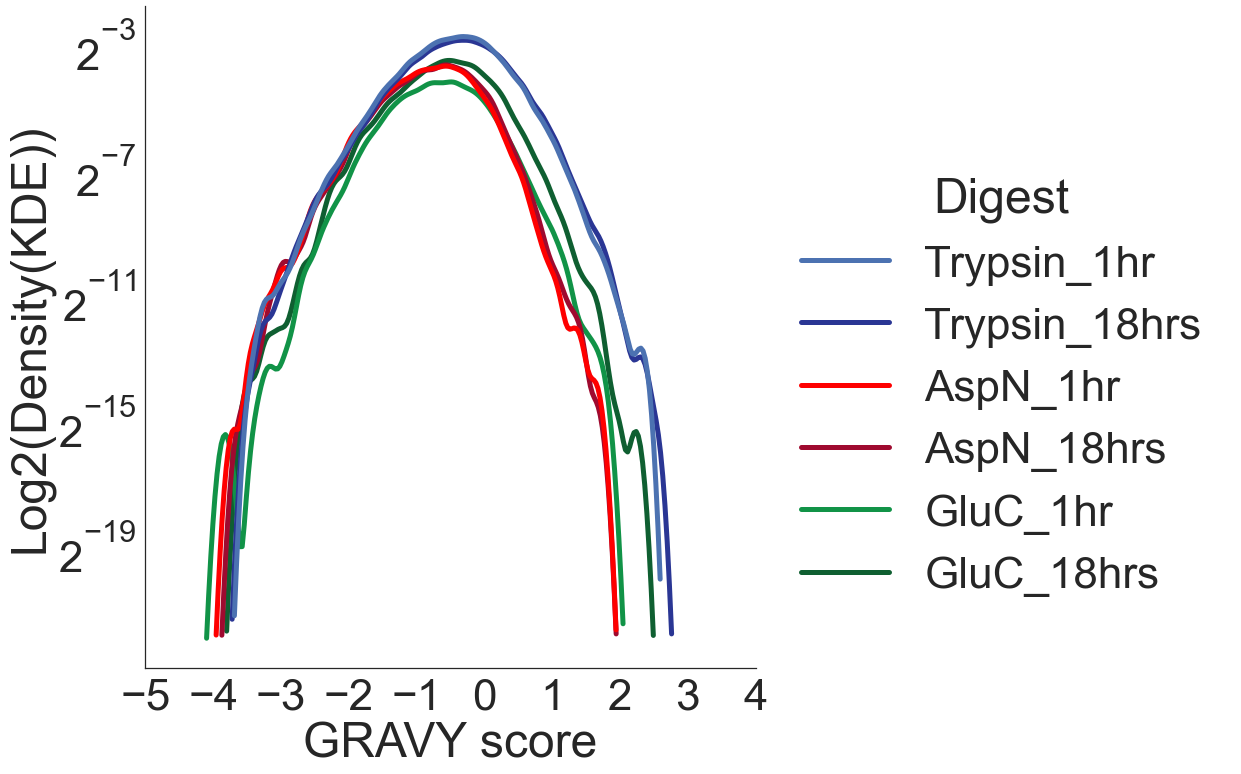

In [43]:
df1 = GRAVY.stack().reset_index()
df1.columns = ['Null','Digest','GRAVY']
df1.drop(['Null'], axis=1, inplace=True)
df1
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="GRAVY", hue="Digest",
    kind="kde", height=12,log_scale=(0,2),palette=colors,linewidth=5  
)
plt.xticks(np.arange(-5,5,1))
plt.xlabel('GRAVY score', fontsize=48)
plt.ylabel('Log2(Density(KDE))', fontsize=48)
g.savefig("GRAVY.eps")

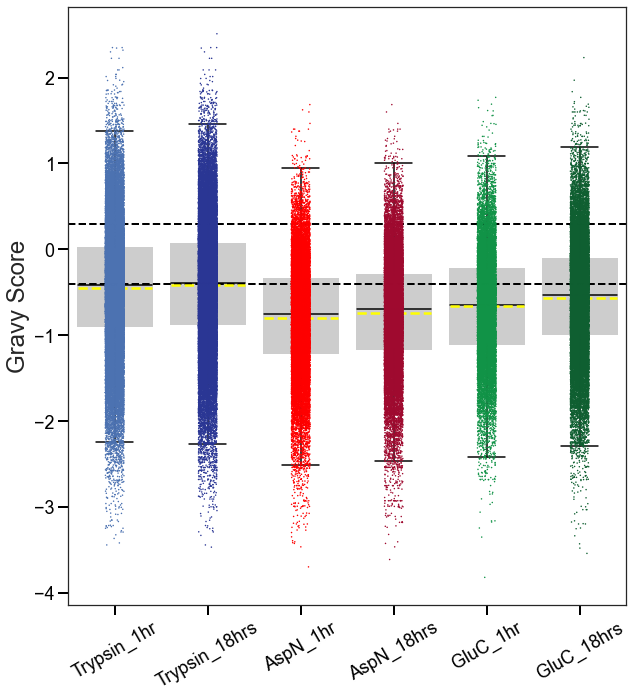

In [44]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=GRAVY,palette=colors,s=1.5)
sns.boxplot(data=GRAVY,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Gravy Score",fontsize=24)
plt.xticks(fontsize=18,rotation=30)
plt.yticks(fontsize=18)
plt.axhline(y=0.3, linestyle="--",color='black',linewidth=2)
plt.axhline(y=-0.4, linestyle="--",color='black',linewidth=2)
# plt.savefig('Hydro_Box',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

## Grouped Peptide Analyses

In [45]:
og_pep.groupby(['Protein']).size().reset_index(name='counts')

,Protein,counts
0,A0A0B4J2D5,43
1,A0A0B4J2F0,2
2,A0A1B0GU29,1
3,A0A1B0GUS4,53
4,A0A1B0GWK0,1
...,...,...
5156,Q9Y6X3,6
5157,Q9Y6X9,2
5158,Q9Y6Y0,3
5159,Q9Y6Y8,8


### Grouping by Protein Identification (# of Peptides per Protein)

In [46]:
grouping = ['Protein']

T18_Counts=T18_50_pep.groupby(grouping).size().reset_index(name='counts')
T1_Counts=T1_50_pep.groupby(grouping).size().reset_index(name='counts')
A18_Counts=A18_50_pep.groupby(grouping).size().reset_index(name='counts')
A1_Counts=A1_50_pep.groupby(grouping).size().reset_index(name='counts')
G18_Counts=G18_50_pep.groupby(grouping).size().reset_index(name='counts')
G1_Counts=G1_50_pep.groupby(grouping).size().reset_index(name='counts')
# counts=pd.concat([T18_Counts, T1_Counts,A18_Counts,A1_Counts,G18_Counts,G1_Counts],axis=1)
# counts.columns=['T18','T18_Counts','T1','T1_Counts','A18','A18_Counts','A1','A1_Counts','G18','G18_Counts','G1','G1_Counts']
# counts = counts.sort_values(by ='G1_Counts', ascending=False )
T18_Counts

,Protein,counts
0,A0A0B4J2D5,9
1,A0A0B4J2F0,1
2,A0A1B0GUS4,14
3,A0AVT1,33
4,A0FGR8,3
...,...,...
4196,Q9Y6W5,5
4197,Q9Y6X3,2
4198,Q9Y6X9,1
4199,Q9Y6Y0,2


### Trypsin 18 hours, Counting protiens with > or < 1 peptide IDs

In [47]:
T18_grouped=T18_50_pep.groupby(['Protein'], as_index=False).mean()
T18_50_pop=pd.merge(T18_grouped, T18_Counts, on="Protein")
T18_x2 = T18_50_pop.loc[(T18_50_pop['counts']) > 1]
T18_x3 = T18_50_pop.loc[(T18_50_pop['counts']) == 1]
T18_x4=(len(T18_x3)/len(T18_x2))*100 
print(" The Number of Proteins with greater than 1 peptide detected is:")
print(len(T18_x2))
print(" The Number of Proteins with only 1 peptide detected is:")
print(len(T18_x3))
print("The Ratio is:")
print(T18_x4)
T18_x2

 The Number of Proteins with greater than 1 peptide detected is:
3456
 The Number of Proteins with only 1 peptide detected is:
745
The Ratio is:
21.556712962962962


,Protein,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature Trypsin_18hr_1:50_Rep2,Protein ID,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z,counts
0,A0A0B4J2D5,5.265547e+07,1.190207e+07,1.000000,0.555556,1531.0,1813.034467,135.308889,99.533333,631.090211,2.777778,17.111111,6.855496,-0.079744,-0.222222,9
2,A0A1B0GUS4,2.461900e+08,8.043314e+06,1.428571,0.142857,2478.0,2165.191043,185.827857,99.842857,808.472679,2.714286,19.142857,5.571309,-0.408880,-1.142857,14
3,A0AVT1,2.687987e+07,1.301127e+07,0.787879,0.787879,677.0,1496.997055,132.290303,99.890909,614.522612,2.454545,13.030303,7.081155,-0.143922,0.000000,33
4,A0FGR8,0.000000e+00,3.953000e+06,0.000000,1.000000,3338.0,1216.668000,100.320000,99.366667,531.689600,2.333333,11.000000,5.458200,0.037802,-0.666667,3
5,A0MZ66,5.553889e+06,3.917011e+06,0.333333,0.777778,1305.0,1235.652067,116.168889,99.422222,563.284544,2.222222,10.666667,5.729237,-0.253093,-1.000000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,Q9Y6W3,3.809225e+06,6.541750e+05,0.750000,0.250000,3685.0,1210.649800,113.940000,98.950000,546.137875,2.250000,10.250000,7.160405,-0.347235,0.000000,4
4196,Q9Y6W5,1.181494e+07,2.948100e+06,0.800000,0.400000,1748.0,1438.300280,159.812000,99.880000,647.523580,2.200000,12.400000,6.663768,-0.442381,-0.800000,5
4197,Q9Y6X3,7.918400e+06,0.000000e+00,1.000000,0.000000,3284.0,1257.203300,164.110000,98.900000,500.201150,2.500000,10.500000,8.909141,0.071111,0.500000,2
4199,Q9Y6Y0,4.343750e+06,0.000000e+00,1.000000,0.000000,3750.0,1844.866450,142.805000,99.700000,628.432100,3.000000,15.000000,9.099316,-0.413690,1.000000,2


### Trypsin 1 hour, Counting protiens with > or < 1 peptide IDs

In [48]:
T1_grouped=T18_50_pep.groupby(['Protein'], as_index=False).mean()
T1_50_pop=pd.merge(T1_grouped, T1_Counts, on="Protein")
T1_x2 = T1_50_pop.loc[(T1_50_pop['counts']) > 1]
T1_x3 = T1_50_pop.loc[(T1_50_pop['counts']) == 1]
T1_x4=len(T1_x3)/len(T1_x2)*100 
print(" The Number of Proteins with greater than 1 peptide detected is:")
print(len(T1_x2))
print(" The Number of Proteins with only 1 peptide detected is:")
print(len(T1_x3))
print("The Ratio is:")
print(T1_x4)

 The Number of Proteins with greater than 1 peptide detected is:
3180
 The Number of Proteins with only 1 peptide detected is:
498
The Ratio is:
15.660377358490566


### AspN 18 hours, Counting protiens with > or < 1 peptide IDs

In [49]:
A18_grouped=A18_50_pep.groupby(['Protein'], as_index=False).mean()
A18_50_pop=pd.merge(A18_grouped, A18_Counts, on="Protein")
A18_x2 = A18_50_pop.loc[(A18_50_pop['counts']) > 1]
A18_x3 = A18_50_pop.loc[(A18_50_pop['counts']) == 1]
A18_x4=len(A18_x3)/len(A18_x2)*100 
print(" The Number of Proteins with greater than 1 peptide detected is:")
print(len(A18_x2))
print(" The Number of Proteins with only 1 peptide detected is:")
print(len(A18_x3))
print("The Ratio is:")
print(A18_x4)

 The Number of Proteins with greater than 1 peptide detected is:
2360
 The Number of Proteins with only 1 peptide detected is:
880
The Ratio is:
37.28813559322034


###  AspN 1 hours, Counting protiens with > or < 1 peptide IDs

In [50]:
A1_grouped=A1_50_pep.groupby(['Protein'], as_index=False).mean()
A1_50_pop=pd.merge(A1_grouped, A1_Counts, on="Protein")
A1_x2 = A1_50_pop.loc[(A1_50_pop['counts']) > 1]
A1_x3 = A1_50_pop.loc[(A1_50_pop['counts']) == 1]
A1_x4=len(A1_x3)/len(A1_x2)*100 
print(" The Number of Proteins with greater than 1 peptide detected is:")
print(len(A1_x2))
print(" The Number of Proteins with only 1 peptide detected is:")
print(len(A1_x3))
print("The Ratio is:")
print(A1_x4)

 The Number of Proteins with greater than 1 peptide detected is:
2601
 The Number of Proteins with only 1 peptide detected is:
953
The Ratio is:
36.639753940792005


### GluC 18 hours, Counting protiens with > or < 1 peptide IDs

In [51]:
G18_grouped=G18_50_pep.groupby(['Protein'], as_index=False).mean()
G18_50_pop=pd.merge(G18_grouped, G18_Counts, on="Protein")
G18_x2 = G18_50_pop.loc[(G18_50_pop['counts']) > 1]
G18_x3 = G18_50_pop.loc[(G18_50_pop['counts']) == 1]
G18_x4=len(G18_x3)/len(G18_x2)*100 
print(" The Number of Proteins with greater than 1 peptide detected is:")
print(len(G18_x2))
print(" The Number of Proteins with only 1 peptide detected is:")
print(len(G18_x3))
print("The Ratio is:")
print(G18_x4)

 The Number of Proteins with greater than 1 peptide detected is:
2246
 The Number of Proteins with only 1 peptide detected is:
729
The Ratio is:
32.457702582368654


### GluC 1 hours, Counting protiens with > or < 1 peptide IDs 

In [52]:
G1_grouped=G1_50_pep.groupby(['Protein'], as_index=False).mean()
G1_50_pop=pd.merge(G1_grouped, G1_Counts, on="Protein")
G1_x2 = G1_50_pop.loc[(G1_50_pop['counts']) > 1]
G1_x3 = G1_50_pop.loc[(G1_50_pop['counts']) == 1]
G1_x4=len(G1_x3)/len(G1_x2)*100 
print(" The Number of Proteins with greater than 1 peptide detected is:")
print(len(G1_x2))
print(" The Number of Proteins with only 1 peptide detected is:")
print(len(G1_x3))
print("The Ratio is:")
print(G1_x4)

 The Number of Proteins with greater than 1 peptide detected is:
1733
 The Number of Proteins with only 1 peptide detected is:
745
The Ratio is:
42.98903635314484


### Peptide per Protein Stacked Bar Graph

In [53]:
df = pd.DataFrame(columns=["Group","Trypsin 18hrs","Trypsin 1hr", "AspN 18hrs","AspN 1hr",
                           "GluC 18hrs","GluC 1hr",], 
                  data=[["= 1 Peptide",T18_x4,T1_x4,A18_x4,A1_x4,G18_x4,G1_x4],
                        ["> 1 Peptide",100-T18_x4,100-T1_x4,100-A18_x4,100-A1_x4,100-G18_x4,100-G1_x4],
])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


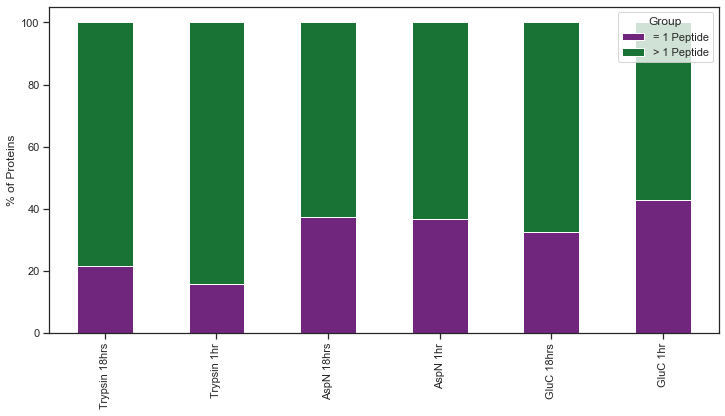

In [54]:
from matplotlib.colors import ListedColormap

df.set_index('Group')\
  .reindex(df.set_index('Group').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("PRGn", 10)), 
          figsize=(12,6))
plt.ylabel("% of Proteins")
plt.savefig('Stacked_Peptide_per_Protein',format=fmt,dpi=dpi,bbox_inches="tight")

### Peptide Feature vs Peptide IDs/Protein

#### Proteins with >2 peptides detected

In [55]:
list_of_lists=[]
labels=["T18_up","T1_up","A18_up","A1_up","G18_up","G1_up"]
proteins=[T18_x2,T1_x2,A18_x2,A1_x2,G18_x2,G1_x2]
datafames=[T18_50_pep,T1_50_pep,A18_50_pep,A1_50_pep,G18_50_pep,G1_50_pep]

for dataframe,protein,label in zip(dataframes,proteins,labels):
    y2=protein['Protein'].astype(str).values.tolist()
    globals()[str(label)]=dataframe[dataframe["Protein"].isin(y2)]

T_18net=T18_up.Protein
%store net

UsageError: Unknown variable 'net'


In [56]:
grab="IPC"
xx=[T18_up[grab],T1_up[grab],A18_up[grab],A1_up[grab],G18_up[grab],G1_up[grab]]
IPC=pd.concat([i for i in xx], axis=1)
IPC.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']
df1 = IPC.stack().reset_index()
df1.columns = ['Null','Digest','IPC']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")
g=sns.displot(
    data=df1,
    x="IPC", hue="Digest",
    kind="kde", height=15,log_scale=(0,2),palette=colors,
    
)
plt.xlabel('Isoelectric Point(IPC)', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Hydrophobicity of Peptides for Proteins >2 Peptides',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.savefig('IPC_Kernel Density_over2peptides',format=fmt,dpi=dpi,bbox_inches="tight")

In [57]:

grab="Hydro_Sum"
xx=[T18_up[grab],T1_up[grab],A18_up[grab],A1_up[grab],G18_up[grab],G1_up[grab]]
GRAVY=pd.concat([i for i in xx], axis=1)
GRAVY.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']
df1 = GRAVY.stack().reset_index()
df1.columns = ['Null','Digest','GRAVY']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")
g=sns.displot(
    data=df1,
    x="GRAVY", hue="Digest",
    kind="kde", height=15,log_scale=(0,2),palette=colors,
    
)
plt.xlabel('GRAVY Score', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.xticks(np.arange(-4,5,1))
plt.title('Hydrophobicity of Peptides for Proteins >2 Peptides',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.savefig('GRAVY_Kernel Density_over2peptides',format=fmt,dpi=dpi,bbox_inches="tight")

#### Proteins with <2 peptides detected

In [58]:
list_of_lists=[]
labels=["T18_down","T1_down","A18_down","A1_down","G18_down","G1_down"]
proteins=[T18_x3,T1_x3,A18_x3,A1_x3,G18_x3,G1_x3]
datafames=[T18_50_pep,T1_50_pep,A18_50_pep,A1_50_pep,G18_50_pep,G1_50_pep]

for dataframe,protein,label in zip(dataframes,proteins,labels):
    y2=protein['Protein'].astype(str).values.tolist()
    globals()[str(label)]=dataframe[dataframe["Protein"].isin(y2)]

T18_down

,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Feature Tryp_1hr_1:50_Rep1,#Feature Tryp_1hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
37360,8852800.0,10493000.0,1,1,963,Q9NYV4,RVPLALHPVVGQPFLKA,CDK12,1613.9657,169.14,99.9,538.9960,3,15,11.535029,0.594118,2.0
37361,0.0,2218200.0,0,1,963,Q9NYV4,RSNEETDDYGKAQVAKS,CDK12,1653.7482,28.52,99.9,552.2568,3,15,4.609131,-1.735294,-1.0
37362,213430000.0,200620000.0,2,2,963,Q9NYV4,LADFGLARL,CDK12,861.4708,102.00,99.9,431.7432,2,8,6.736748,1.044444,0.0
37363,0.0,2342600.0,0,1,963,Q9NYV4,RLYNSEESRPYTNKV,CDK12,1600.7368,33.97,99.9,534.5923,3,13,9.516240,-1.693333,1.0
37364,0.0,5982000.0,0,1,963,Q9NYV4,RCTAEQTLQSDFLKDVELSKM,CDK12,2211.0728,198.92,98.0,738.0311,3,19,4.609131,-0.557143,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48111,3817200.0,3016300.0,1,1,9063,Q8WTS1,MHPDIPVSVIFGARS,ABHD5,1537.8075,184.43,98.9,513.6105,3,14,7.790029,0.500000,0.0
48120,0.0,1274000.0,0,1,8112,O00635,RLEKEEQQTLSRL,TRI38,1359.6993,26.01,98.5,454.2403,3,11,7.160986,-1.576923,0.0
48123,0.0,98092.0,0,1,17916,O60291,RYKDDADSPTEDGDKPRV,MGRN1,1807.7860,18.75,98.6,452.9537,4,16,4.265830,-2.122222,-2.0
48125,5655000.0,0.0,1,0,10837,Q9Y5M8,RGNSLTLIDLPGHESLRL,SRPRB,1720.9108,155.46,98.3,574.6444,3,16,7.790029,-0.216667,0.0


In [59]:
grab="IPC"
xx=[T18_down[grab],T1_down[grab],A18_down[grab],A1_down[grab],G18_down[grab],G1_down[grab]]
IPC=pd.concat([i for i in xx], axis=1)
IPC.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']
df1 = IPC.stack().reset_index()
df1.columns = ['Null','Digest','IPC']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")
g=sns.displot(
    data=df1,
    x="IPC", hue="Digest",
    kind="kde", height=15,log_scale=(0,2),palette=colors,
    
)
plt.xlabel('Isoelectric Point(IPC)', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Hydrophobicity of Peptides for Proteins >2 Peptides',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.savefig('IPC_Kernel Density_under2peptides',format=fmt,dpi=dpi,bbox_inches="tight")

In [60]:
grab="Hydro_Sum"
xx=[T18_down[grab],T1_down[grab],A18_down[grab],A1_down[grab],G18_down[grab],G1_down[grab]]
IPC=pd.concat([i for i in xx], axis=1)
IPC.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']
df1 = IPC.stack().reset_index()
df1.columns = ['Null','Digest','IPC']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")
g=sns.displot(
    data=df1,
    x="IPC", hue="Digest",
    kind="kde", height=15,log_scale=(0,2),palette=colors,
    
)
plt.xlabel('GRAVY Score', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.xticks(np.arange(-4,5,1))
# plt.title('Hydrophobicity of Peptides for Proteins >2 Peptides',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.savefig('GRAVY_Kernel Density_under2peptides',format=fmt,dpi=dpi,bbox_inches="tight")

In [61]:
# stop=stop

# Analysis of Proteins Only

In [62]:
og = pd.read_csv("proteins_1in50only.csv")
og[['Protein', 'Gene']] = og['Accession'].str.split('|', 1, expand=True)
len(og)

5161

In [63]:
og_info=og[['Protein ID','Protein', 'Gene','Avg. Mass','Score (%)','-10lgP','Coverage (%)','#Peptides']]

## Trypsin Protein Analyses

In [64]:
Tryp=og.loc[:, og.columns.str.contains('Tryp')]
Tryp = pd.concat([og_info, Tryp], axis=1)
#Tryp.to_excel('AspN_50only.xlsx')
Tryp.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) Tryp_1hr_1:50_Rep1,Coverage (%) Tryp_1hr_1:50_Rep2,Coverage (%) Tryp_18hr_1:50_Rep1,Coverage (%) Trypsin_18hr_1:50_Rep2,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Spec Tryp_1hr_1:50_Rep1,#Spec Tryp_1hr_1:50_Rep2,#Spec Tryp_18hr_1:50_Rep1,#Spec Trypsin_18hr_1:50_Rep2
count,5161.000000,5.161000e+03,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,3.293000e+03,3.465000e+03,3.528000e+03,3.625000e+03,5161.000000,5161.000000,5161.000000,5161.000000
mean,3547.935478,6.992321e+04,97.709785,191.573588,36.165472,19.409998,15.369696,18.120907,14.660531,11.377834,3.722811e+08,4.597383e+08,8.514842e+08,2.899751e+08,27.111994,28.197249,28.112575,28.201705
std,3500.801600,7.086554e+04,5.037034,121.450790,29.989774,28.045936,19.544694,22.293360,17.731368,12.731387,1.457462e+09,1.699354e+09,3.291765e+09,9.576995e+08,83.698572,80.194293,86.229590,75.561681
min,1.000000,5.026000e+03,57.800000,27.350000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1317.000000,3.006500e+04,98.800000,85.120000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.544000e+06,1.065700e+07,2.058875e+07,9.790500e+06,0.000000,0.000000,0.000000,0.000000
50%,2659.000000,5.011900e+04,99.200000,177.090000,29.000000,10.000000,6.000000,7.000000,7.000000,7.000000,4.454100e+07,5.533800e+07,9.664450e+07,4.069900e+07,4.000000,4.000000,4.000000,5.000000
75%,4229.000000,8.378600e+04,99.200000,279.530000,61.000000,25.000000,25.000000,31.000000,24.000000,19.000000,2.084200e+08,2.739200e+08,4.825725e+08,1.851100e+08,20.000000,23.000000,21.000000,24.000000
max,19575.000000,1.011108e+06,99.200000,598.830000,100.000000,358.000000,91.000000,97.000000,89.000000,83.000000,3.401900e+10,3.857000e+10,7.103800e+10,1.986900e+10,1709.000000,1743.000000,1589.000000,1580.000000


In [65]:
y=str('18hr')
Tryp18_50_pro=Tryp.loc[:, Tryp.columns.str.contains(y)]
Tryp18_50_pro = pd.concat([og_info, Tryp18_50_pro], axis=1)
Tryp18_50_pro=Tryp18_50_pro.loc[(Tryp18_50_pro['#Spec Tryp_18hr_1:50_Rep1'] > 0) | (Tryp18_50_pro['#Spec Trypsin_18hr_1:50_Rep2'] > 0)]
Tryp18_50_pro.to_excel('Tryp_' + y +'_proteins.xlsx')
Tryp18_50_pro.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) Tryp_18hr_1:50_Rep1,Coverage (%) Trypsin_18hr_1:50_Rep2,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Spec Tryp_18hr_1:50_Rep1,#Spec Trypsin_18hr_1:50_Rep2
count,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,3.528000e+03,3.625000e+03,4228.000000,4228.000000
mean,2668.188978,65380.508988,98.500946,220.938096,42.344134,23.246216,17.895695,13.888600,8.514842e+08,2.899751e+08,34.316225,34.425024
std,2634.094992,61293.103816,3.514241,113.800836,29.169858,29.625191,18.052371,12.766585,3.291765e+09,9.576995e+08,94.147798,82.191953
min,1.000000,5780.000000,58.900000,27.440000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1078.750000,29568.000000,99.100000,130.687500,15.750000,6.000000,3.000000,3.000000,2.058875e+07,9.790500e+06,2.000000,2.000000
50%,2171.500000,48764.500000,99.200000,212.200000,39.000000,14.000000,12.000000,10.000000,9.664450e+07,4.069900e+07,8.000000,9.000000
75%,3385.250000,80596.000000,99.200000,302.510000,66.000000,30.000000,28.000000,22.000000,4.825725e+08,1.851100e+08,28.000000,33.000000
max,19398.000000,860679.000000,99.200000,598.830000,100.000000,358.000000,89.000000,83.000000,7.103800e+10,1.986900e+10,1589.000000,1580.000000


In [66]:
Tryp18_50_pro['AvgCoverage'] = Tryp18_50_pro[['Coverage (%) Tryp_18hr_1:50_Rep1','Coverage (%) Trypsin_18hr_1:50_Rep2']].mean(axis=1)
Tryp18_50_pro['MaxCoverage'] = Tryp18_50_pro[['Coverage (%) Tryp_18hr_1:50_Rep1','Coverage (%) Trypsin_18hr_1:50_Rep2']].max(axis=1)
Tryp18_50_coverage=Tryp18_50_pro.loc[(Tryp18_50_pro['AvgCoverage']>0)]
Tryp18_50_coverage.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) Tryp_18hr_1:50_Rep1,Coverage (%) Trypsin_18hr_1:50_Rep2,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Spec Tryp_18hr_1:50_Rep1,#Spec Trypsin_18hr_1:50_Rep2,AvgCoverage,MaxCoverage
count,4207.000000,4207.000000,4207.000000,4207.000000,4207.000000,4207.000000,4207.000000,4207.000000,3.521000e+03,3.615000e+03,4207.000000,4207.000000,4207.000000,4207.000000
mean,2658.699311,63909.626337,98.501925,221.681543,42.547421,23.339910,17.985025,13.957927,8.530965e+08,2.907691e+08,34.484906,34.590207,15.971476,19.779178
std,2634.617269,56374.344558,3.521945,113.550584,29.099303,29.664561,18.052929,12.760547,3.294835e+09,9.589044e+08,94.352163,82.363487,14.706691,17.532416
min,1.000000,5780.000000,58.900000,27.440000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.500000,1.000000
25%,1073.500000,29484.000000,99.100000,131.800000,16.000000,6.000000,3.000000,3.000000,2.083800e+07,9.935500e+06,2.000000,2.000000,3.500000,5.000000
50%,2162.000000,48548.000000,99.200000,213.490000,40.000000,14.000000,12.000000,10.000000,9.713000e+07,4.101700e+07,8.000000,9.000000,11.000000,14.000000
75%,3369.500000,80000.000000,99.200000,303.570000,66.000000,30.000000,29.000000,22.000000,4.847100e+08,1.856600e+08,28.000000,33.000000,25.500000,30.000000
max,19398.000000,838323.000000,99.200000,598.830000,100.000000,358.000000,89.000000,83.000000,7.103800e+10,1.986900e+10,1589.000000,1580.000000,86.000000,89.000000


In [67]:
Tryp18_50_coverage.median()

Protein ID                                 2162.00
Avg. Mass                                 48548.00
Score (%)                                    99.20
-10lgP                                      213.49
Coverage (%)                                 40.00
#Peptides                                    14.00
Coverage (%) Tryp_18hr_1:50_Rep1             12.00
Coverage (%) Trypsin_18hr_1:50_Rep2          10.00
Area Tryp_18hr_1:50_Rep1               97130000.00
Area Trypsin_18hr_1:50_Rep2            41017000.00
#Spec Tryp_18hr_1:50_Rep1                     8.00
#Spec Trypsin_18hr_1:50_Rep2                  9.00
AvgCoverage                                  11.00
MaxCoverage                                  14.00
dtype: float64

In [68]:
y=str('1hr')
Tryp1_50_pro=Tryp.loc[:, Tryp.columns.str.contains(y)]
Tryp1_50_pro = pd.concat([og_info, Tryp1_50_pro], axis=1)
Tryp1_50_pro=Tryp1_50_pro.loc[(Tryp1_50_pro['#Spec Tryp_1hr_1:50_Rep1'] > 0) | (Tryp1_50_pro['#Spec Tryp_1hr_1:50_Rep2'] > 0)]
Tryp1_50_pro.to_excel('Tryp_' + y +'_proteins.xlsx')
Tryp1_50_pro.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) Tryp_1hr_1:50_Rep1,Coverage (%) Tryp_1hr_1:50_Rep2,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Spec Tryp_1hr_1:50_Rep1,#Spec Tryp_1hr_1:50_Rep2
count,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3.293000e+03,3.465000e+03,3957.000000,3957.000000
mean,2426.448825,64867.201162,98.703235,230.737357,44.641648,24.653525,20.046247,23.634572,3.722811e+08,4.597383e+08,35.361385,36.776851
std,2332.419380,59910.088663,2.812585,110.715535,28.656405,30.111740,20.111774,22.757567,1.457462e+09,1.699354e+09,94.051907,89.848834
min,1.000000,5265.000000,61.500000,27.350000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1011.000000,29484.000000,99.100000,146.320000,19.000000,7.000000,3.000000,4.000000,9.544000e+06,1.065700e+07,2.000000,2.000000
50%,2026.000000,48843.000000,99.200000,223.160000,43.000000,15.000000,13.000000,16.000000,4.454100e+07,5.533800e+07,8.000000,9.000000
75%,3173.000000,80225.000000,99.200000,311.040000,69.000000,31.000000,32.000000,39.000000,2.084200e+08,2.739200e+08,30.000000,34.000000
max,19043.000000,860679.000000,99.200000,598.830000,100.000000,358.000000,91.000000,97.000000,3.401900e+10,3.857000e+10,1709.000000,1743.000000


In [69]:
Tryp1_50_pro['AvgCoverage'] = Tryp1_50_pro[['Coverage (%) Tryp_1hr_1:50_Rep1','Coverage (%) Tryp_1hr_1:50_Rep2']].mean(axis=1)
Tryp1_50_pro['MaxCoverage'] = Tryp1_50_pro[['Coverage (%) Tryp_1hr_1:50_Rep1','Coverage (%) Tryp_1hr_1:50_Rep2']].max(axis=1)
Tryp1_50_coverage=Tryp1_50_pro.loc[(Tryp1_50_pro['AvgCoverage']>0)]
Tryp1_50_coverage.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) Tryp_1hr_1:50_Rep1,Coverage (%) Tryp_1hr_1:50_Rep2,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Spec Tryp_1hr_1:50_Rep1,#Spec Tryp_1hr_1:50_Rep2,AvgCoverage,MaxCoverage
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3.285000e+03,3.454000e+03,3937.000000,3937.000000,3937.000000,3937.000000
mean,2418.238252,63445.178308,98.704445,231.409924,44.850902,24.737363,20.148082,23.754636,3.731823e+08,4.611563e+08,35.536957,36.958852,21.951359,25.185420
std,2331.888760,55354.315699,2.818784,110.483932,28.575635,30.154785,20.111849,22.752708,1.459121e+09,1.701871e+09,94.258166,90.040395,21.016000,22.432876
min,1.000000,5265.000000,61.500000,27.350000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.500000,1.000000
25%,1005.000000,29412.000000,99.100000,147.380000,19.000000,7.000000,4.000000,4.000000,9.605000e+06,1.083675e+07,2.000000,2.000000,4.000000,6.000000
50%,2018.000000,48551.000000,99.200000,223.660000,43.000000,15.000000,13.000000,16.000000,4.495600e+07,5.554150e+07,8.000000,9.000000,14.500000,18.000000
75%,3164.000000,79468.000000,99.200000,311.630000,69.000000,31.000000,33.000000,39.000000,2.087700e+08,2.750000e+08,30.000000,35.000000,35.500000,40.000000
max,19043.000000,838323.000000,99.200000,598.830000,100.000000,358.000000,91.000000,97.000000,3.401900e+10,3.857000e+10,1709.000000,1743.000000,92.000000,97.000000


In [70]:
Tryp1_50_coverage.median()

Protein ID                             2018.00
Avg. Mass                             48551.00
Score (%)                                99.20
-10lgP                                  223.66
Coverage (%)                             43.00
#Peptides                                15.00
Coverage (%) Tryp_1hr_1:50_Rep1          13.00
Coverage (%) Tryp_1hr_1:50_Rep2          16.00
Area Tryp_1hr_1:50_Rep1            44956000.00
Area Tryp_1hr_1:50_Rep2            55541500.00
#Spec Tryp_1hr_1:50_Rep1                  8.00
#Spec Tryp_1hr_1:50_Rep2                  9.00
AvgCoverage                              14.50
MaxCoverage                              18.00
dtype: float64

In [71]:
common=len(list(set(Tryp18_50_coverage.Protein) & set(Tryp1_50_coverage.Protein)))
common

3695

In [72]:
unique=len(list(set(Tryp18_50_coverage.Protein) ^ set(Tryp1_50_coverage.Protein)))
unique

754

In [73]:
Ratio=(unique/(common+unique))*100
Ratio

16.947628680602385

### Comparison of Time

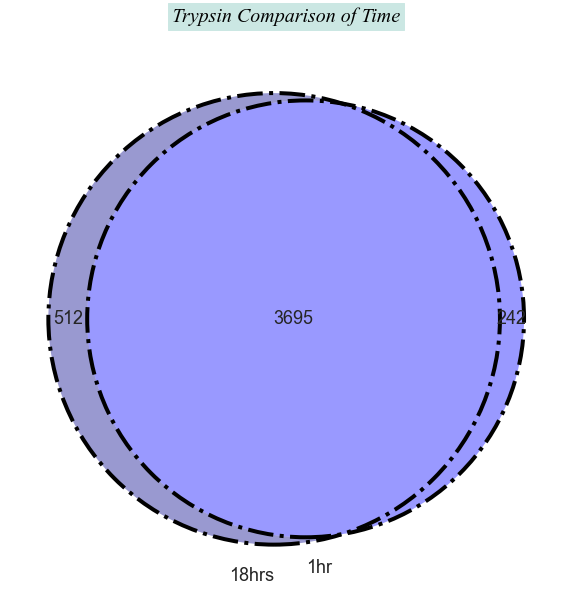

In [74]:
x=set(Tryp18_50_coverage.Gene)
x2=set(Tryp1_50_coverage.Gene)
vd2=venn2([x, x2],set_labels=('18hrs', '1hr'),set_colors=('darkblue', 'blue'), alpha = 0.4)
venn2_circles([x,x2], linestyle='-.', linewidth=4, color='black')
for text in vd2.set_labels:
 text.set_fontsize(18);
for text in vd2.subset_labels:
 text.set_fontsize(18)
plt.title('Trypsin Comparison of Time',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.show()

## AspN Protein Analyses

In [75]:
AspN=og.loc[:, og.columns.str.contains('AspN')]
AspN = pd.concat([og_info, AspN], axis=1)
#AspN.to_excel('AspN_50only.xlsx')
AspN

,Protein ID,Protein,Gene,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) AspN_1hr_1:50_Rep1,Coverage (%) AspN_1hr_1:50_Rep2,Coverage (%) AspN_18hr_1:50_Rep1,Coverage (%) AspN_18hr_1:50_Rep2,Area AspN_1hr_1:50_Rep1,Area AspN_1hr_1:50_Rep2,Area AspN_18hr_1:50_Rep1,Area AspN_18hr_1:50_Rep2,#Spec AspN_1hr_1:50_Rep1,#Spec AspN_1hr_1:50_Rep2,#Spec AspN_18hr_1:50_Rep1,#Spec AspN_18hr_1:50_Rep2
0,42,P08238,HS90B_HUMAN,83264,99.2,598.83,99,226,75,93,87,90,9.517000e+09,1.251500e+10,1.708900e+10,9.245600e+09,982,1196,1481,926
1,73,P07900,HS90A_HUMAN,84660,99.2,576.52,98,206,73,91,83,90,5.898700e+09,9.463400e+09,1.142200e+10,6.897200e+09,586,868,1048,653
2,297,P21333,FLNA_HUMAN,280737,99.2,570.59,87,274,38,43,35,37,1.790200e+09,2.331300e+09,2.021200e+09,2.069800e+09,295,281,272,261
3,402,P49327,FAS_HUMAN,273424,99.2,563.63,83,221,22,31,26,31,7.549300e+08,1.273900e+09,1.611100e+09,1.631300e+09,161,172,273,190
4,5,P06733,ENOA_HUMAN,47169,99.2,557.08,100,124,81,79,81,72,1.520600e+10,1.716600e+10,2.326700e+10,1.004400e+10,822,692,1122,397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,5322,Q9P2D7,DYH1_HUMAN,487482,98.1,27.39,0,1,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0
5157,5276,Q9ULH7,MRTFB_HUMAN,118127,98.1,27.38,1,1,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0
5158,6094,Q9UPS6,SET1B_HUMAN,212801,97.4,27.36,1,1,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0
5159,6047,Q8TEW0,PARD3_HUMAN,151422,97.5,27.36,3,1,0,3,0,0,NaN,5.612400e+06,NaN,NaN,0,1,0,0


In [76]:
y=str('18hr')
AspN18_50_pro=AspN.loc[:, AspN.columns.str.contains(y)]
AspN18_50_pro = pd.concat([og_info, AspN18_50_pro], axis=1)
AspN18_50_pro=AspN18_50_pro.loc[(AspN18_50_pro['#Spec AspN_18hr_1:50_Rep1'] > 0) | (AspN18_50_pro['#Spec AspN_18hr_1:50_Rep2'] > 0)]
AspN18_50_pro.to_excel('AspN_' + y +'_proteins.xlsx')
AspN18_50_pro.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) AspN_18hr_1:50_Rep1,Coverage (%) AspN_18hr_1:50_Rep2,Area AspN_18hr_1:50_Rep1,Area AspN_18hr_1:50_Rep2,#Spec AspN_18hr_1:50_Rep1,#Spec AspN_18hr_1:50_Rep2
count,3267.00000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,2.684000e+03,2.628000e+03,3267.000000,3267.000000
mean,2154.21457,67795.921028,98.790940,251.222115,49.511172,28.442608,15.393939,13.128864,2.836757e+08,1.973080e+08,29.960820,18.463422
std,2206.70838,66290.746068,2.469036,109.163613,28.206234,31.793742,18.102738,16.560035,1.312560e+09,8.336589e+08,93.014608,51.638251
min,1.00000,5265.000000,58.200000,27.400000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,827.50000,30168.500000,99.200000,174.360000,26.000000,9.000000,2.000000,2.000000,8.113800e+06,8.000525e+06,1.000000,1.000000
50%,1690.00000,49308.000000,99.200000,251.300000,50.000000,19.000000,8.000000,7.000000,2.978600e+07,2.870200e+07,6.000000,5.000000
75%,2782.00000,81826.000000,99.200000,327.325000,73.000000,36.000000,22.000000,19.000000,1.418775e+08,1.247775e+08,21.000000,15.000000
max,19503.00000,838323.000000,99.200000,598.830000,100.000000,358.000000,99.000000,99.000000,3.284300e+10,2.209900e+10,1481.000000,926.000000


In [77]:
AspN18_50_pro['AvgCoverage'] = AspN18_50_pro[['Coverage (%) AspN_18hr_1:50_Rep1','Coverage (%) AspN_18hr_1:50_Rep2']].mean(axis=1)
AspN18_50_pro['MaxCoverage'] = AspN18_50_pro[['Coverage (%) AspN_18hr_1:50_Rep1','Coverage (%) AspN_18hr_1:50_Rep2']].max(axis=1)
AspN18_50_coverage=AspN18_50_pro.loc[(AspN18_50_pro['AvgCoverage']>0)]
AspN18_50_coverage.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) AspN_18hr_1:50_Rep1,Coverage (%) AspN_18hr_1:50_Rep2,Area AspN_18hr_1:50_Rep1,Area AspN_18hr_1:50_Rep2,#Spec AspN_18hr_1:50_Rep1,#Spec AspN_18hr_1:50_Rep2,AvgCoverage,MaxCoverage
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.00000,3231.000000,3231.000000,3231.000000,2.670000e+03,2.608000e+03,3231.000000,3231.000000,3231.000000,3231.000000
mean,2125.678118,64709.215104,98.800186,253.061383,50.02476,28.680904,15.565460,13.275147,2.851319e+08,1.986996e+08,30.289384,18.657691,14.420303,17.616218
std,2189.151157,57958.057933,2.476684,108.089894,27.93062,31.870151,18.129837,16.593635,1.315843e+09,8.366934e+08,93.479096,51.892111,16.671361,18.504172
min,1.000000,5265.000000,58.200000,27.400000,1.00000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.500000,1.000000
25%,818.500000,29955.000000,99.200000,177.065000,26.00000,9.000000,3.000000,2.000000,8.278125e+06,8.086300e+06,2.000000,1.000000,3.000000,4.000000
50%,1675.000000,48841.000000,99.200000,252.840000,51.00000,19.000000,9.000000,7.000000,3.013150e+07,2.901550e+07,6.000000,5.000000,8.000000,11.000000
75%,2751.500000,80572.500000,99.200000,328.295000,73.00000,36.000000,22.000000,19.000000,1.420750e+08,1.251200e+08,22.000000,16.000000,20.000000,25.000000
max,19503.000000,838323.000000,99.200000,598.830000,100.00000,358.000000,99.000000,99.000000,3.284300e+10,2.209900e+10,1481.000000,926.000000,99.000000,99.000000


In [78]:
AspN18_50_coverage.median()

Protein ID                              1675.00
Avg. Mass                              48841.00
Score (%)                                 99.20
-10lgP                                   252.84
Coverage (%)                              51.00
#Peptides                                 19.00
Coverage (%) AspN_18hr_1:50_Rep1           9.00
Coverage (%) AspN_18hr_1:50_Rep2           7.00
Area AspN_18hr_1:50_Rep1            30131500.00
Area AspN_18hr_1:50_Rep2            29015500.00
#Spec AspN_18hr_1:50_Rep1                  6.00
#Spec AspN_18hr_1:50_Rep2                  5.00
AvgCoverage                                8.00
MaxCoverage                               11.00
dtype: float64

In [79]:
y=str('1hr')
AspN1_50_pro=AspN.loc[:, AspN.columns.str.contains(y)]
AspN1_50_pro = pd.concat([og_info, AspN1_50_pro], axis=1)
AspN1_50_pro=AspN1_50_pro.loc[(AspN1_50_pro['#Spec AspN_1hr_1:50_Rep1'] > 0) | (AspN1_50_pro['#Spec AspN_1hr_1:50_Rep2'] > 0)]
AspN1_50_pro.to_excel('AspN_' + y +'_proteins.xlsx')
AspN1_50_pro.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) AspN_1hr_1:50_Rep1,Coverage (%) AspN_1hr_1:50_Rep2,Area AspN_1hr_1:50_Rep1,Area AspN_1hr_1:50_Rep2,#Spec AspN_1hr_1:50_Rep1,#Spec AspN_1hr_1:50_Rep2
count,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3.074000e+03,2.916000e+03,3579.000000,3579.000000
mean,2325.202850,67764.479743,98.704946,239.996731,46.805812,26.518022,16.723666,16.030455,1.752945e+08,2.237558e+08,26.343671,23.162615
std,2350.545193,66110.275004,2.814211,111.262519,28.706773,31.044170,18.713782,19.467977,8.902193e+08,9.486071e+08,70.760220,62.486961
min,1.000000,5053.000000,58.700000,27.360000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,909.500000,30605.000000,99.100000,155.800000,21.000000,8.000000,3.000000,2.000000,5.819000e+06,7.236600e+06,2.000000,1.000000
50%,1854.000000,49648.000000,99.200000,236.630000,46.000000,17.000000,10.000000,8.000000,2.165850e+07,2.950150e+07,7.000000,5.000000
75%,3004.500000,82196.000000,99.200000,320.210000,71.000000,34.000000,24.000000,23.000000,8.717325e+07,1.284050e+08,22.000000,20.000000
max,19436.000000,860679.000000,99.200000,598.830000,100.000000,358.000000,99.000000,100.000000,3.023700e+10,2.443600e+10,1195.000000,1196.000000


In [80]:
AspN1_50_pro['AvgCoverage'] = AspN1_50_pro[['Coverage (%) AspN_1hr_1:50_Rep1','Coverage (%) AspN_1hr_1:50_Rep2']].mean(axis=1)
AspN1_50_pro['MaxCoverage'] = AspN1_50_pro[['Coverage (%) AspN_1hr_1:50_Rep1','Coverage (%) AspN_1hr_1:50_Rep2']].max(axis=1)
AspN1_50_coverage=AspN1_50_pro.loc[(AspN1_50_pro['AvgCoverage']>0)]
AspN1_50_coverage.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) AspN_1hr_1:50_Rep1,Coverage (%) AspN_1hr_1:50_Rep2,Area AspN_1hr_1:50_Rep1,Area AspN_1hr_1:50_Rep2,#Spec AspN_1hr_1:50_Rep1,#Spec AspN_1hr_1:50_Rep2,AvgCoverage,MaxCoverage
count,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3.063000e+03,2.900000e+03,3555.000000,3555.000000,3555.000000,3555.000000
mean,2313.342053,65717.955274,98.707370,240.913044,47.095077,26.643319,16.836568,16.138678,1.759091e+08,2.249585e+08,26.516174,23.312518,16.487623,19.404219
std,2347.643403,59492.828279,2.821557,110.943537,28.583654,31.105371,18.726161,19.488829,8.917577e+08,9.510824e+08,70.967436,62.670813,18.529482,20.010423
min,1.000000,5053.000000,58.700000,27.360000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.500000,1.000000
25%,903.500000,30378.500000,99.100000,156.760000,22.000000,8.000000,3.000000,2.000000,5.892400e+06,7.408275e+06,2.000000,1.000000,3.000000,5.000000
50%,1842.000000,49308.000000,99.200000,238.290000,47.000000,17.000000,10.000000,8.000000,2.183000e+07,2.997650e+07,7.000000,5.000000,9.500000,12.000000
75%,2995.500000,81315.000000,99.200000,320.730000,71.000000,34.000000,25.000000,23.500000,8.858900e+07,1.306325e+08,22.000000,20.000000,23.500000,28.000000
max,19436.000000,838323.000000,99.200000,598.830000,100.000000,358.000000,99.000000,100.000000,3.023700e+10,2.443600e+10,1195.000000,1196.000000,99.000000,100.000000


In [81]:
AspN1_50_coverage.median()

Protein ID                             1842.00
Avg. Mass                             49308.00
Score (%)                                99.20
-10lgP                                  238.29
Coverage (%)                             47.00
#Peptides                                17.00
Coverage (%) AspN_1hr_1:50_Rep1          10.00
Coverage (%) AspN_1hr_1:50_Rep2           8.00
Area AspN_1hr_1:50_Rep1            21830000.00
Area AspN_1hr_1:50_Rep2            29976500.00
#Spec AspN_1hr_1:50_Rep1                  7.00
#Spec AspN_1hr_1:50_Rep2                  5.00
AvgCoverage                               9.50
MaxCoverage                              12.00
dtype: float64

In [82]:
common=len(list(set(AspN18_50_coverage.Gene) & set(AspN1_50_coverage.Gene)))
common

2944

In [83]:
unique=len(list(set(AspN18_50_coverage.Gene) ^ set(AspN1_50_coverage.Gene)))
unique

898

In [84]:
Ratio=(unique/(common+unique))*100
Ratio

23.373243102550756

### Comparison of Time

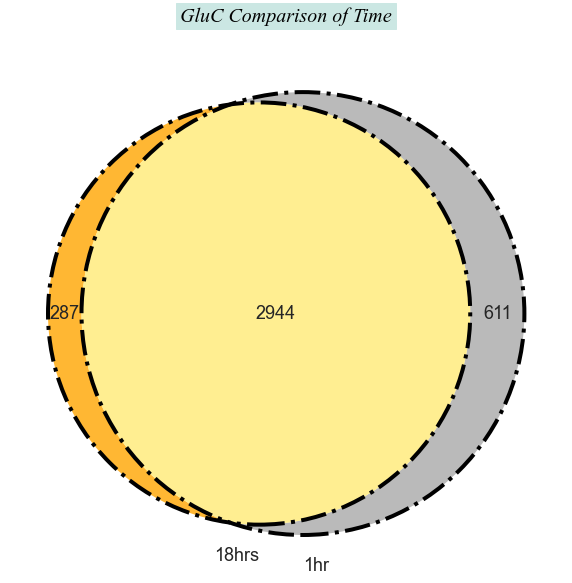

In [85]:
x=set(AspN18_50_coverage.Gene)
x2=set(AspN1_50_coverage.Gene)
vd2=venn2([x, x2],set_labels=('18hrs', '1hr'),set_colors=('orange', 'darkgrey'), alpha = 0.8)
venn2_circles([x,x2], linestyle='-.', linewidth=4, color='black')
for text in vd2.set_labels:
 text.set_fontsize(18);
for text in vd2.subset_labels:
 text.set_fontsize(18)
plt.title('GluC Comparison of Time',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.show()

## GluC Protein Analyses

In [86]:
GluC=og.loc[:, og.columns.str.contains('GluC')]
GluC = pd.concat([og_info, GluC], axis=1)
#AspN.to_excel('GluC_50only.xlsx')
GluC

,Protein ID,Protein,Gene,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) GluC_1hr_1:50_Rep1,Coverage (%) GluC_1hr_1:50_Rep2,Coverage (%) GluC_18hr_1:50_Rep1,Coverage (%) GluC_18hr_1:50_Rep2,Area GluC_1hr_1:50_Rep1,Area GluC_1hr_1:50_Rep2,Area GluC_18hr_1:50_Rep1,Area GluC_18hr_1:50_Rep2,#Spec GluC_1hr_1:50_Rep1,#Spec GluC_1hr_1:50_Rep2,#Spec GluC_18hr_1:50_Rep1,#Spec GluC_18hr_1:50_Rep2
0,42,P08238,HS90B_HUMAN,83264,99.2,598.83,99,226,51,52,60,76,9.380600e+08,4.492000e+08,5.271900e+09,2.407800e+09,229,277,674,1993
1,73,P07900,HS90A_HUMAN,84660,99.2,576.52,98,206,52,59,51,70,7.554400e+08,4.669300e+08,4.259800e+09,2.617700e+09,180,215,470,1567
2,297,P21333,FLNA_HUMAN,280737,99.2,570.59,87,274,7,14,23,39,3.719300e+08,2.476700e+08,2.322900e+09,1.003300e+09,68,98,305,853
3,402,P49327,FAS_HUMAN,273424,99.2,563.63,83,221,0,2,5,13,1.755500e+07,1.595400e+07,2.283000e+08,1.455400e+08,4,18,36,167
4,5,P06733,ENOA_HUMAN,47169,99.2,557.08,100,124,73,67,73,78,3.218300e+09,1.162800e+09,2.444600e+10,8.587600e+09,290,235,877,2351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,5322,Q9P2D7,DYH1_HUMAN,487482,98.1,27.39,0,1,0,0,0,0,NaN,NaN,NaN,7.847500e+06,0,0,0,1
5157,5276,Q9ULH7,MRTFB_HUMAN,118127,98.1,27.38,1,1,1,0,0,0,2.076900e+06,NaN,NaN,NaN,1,0,0,0
5158,6094,Q9UPS6,SET1B_HUMAN,212801,97.4,27.36,1,1,0,0,1,0,NaN,NaN,1.734800e+06,NaN,0,0,1,0
5159,6047,Q8TEW0,PARD3_HUMAN,151422,97.5,27.36,3,1,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0


In [87]:
y=str('18hr')
GluC18_50_pro=GluC.loc[:, GluC.columns.str.contains(y)]
GluC18_50_pro = pd.concat([og_info, GluC18_50_pro], axis=1)
GluC18_50_pro=GluC18_50_pro.loc[(GluC18_50_pro['#Spec GluC_18hr_1:50_Rep1'] > 0) | (GluC18_50_pro['#Spec GluC_18hr_1:50_Rep2'] > 0)]
GluC18_50_pro.to_excel('GluC_' + y +'_proteins.xlsx')
GluC18_50_pro.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) GluC_18hr_1:50_Rep1,Coverage (%) GluC_18hr_1:50_Rep2,Area GluC_18hr_1:50_Rep1,Area GluC_18hr_1:50_Rep2,#Spec GluC_18hr_1:50_Rep1,#Spec GluC_18hr_1:50_Rep2
count,3008.000000,3008.00000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,2.462000e+03,2.454000e+03,3008.000000,3008.000000
mean,2171.564827,66666.23238,98.784375,251.480449,50.505652,29.071809,13.877660,14.929521,2.774702e+08,1.025641e+08,26.059176,63.776928
std,2202.785038,68439.42673,2.657556,112.494889,28.687622,32.861767,16.282804,17.883980,1.255245e+09,4.141840e+08,66.775227,161.245152
min,1.000000,5026.00000,58.900000,27.360000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,789.750000,28056.25000,99.100000,166.642500,26.000000,9.000000,2.000000,2.000000,8.663775e+06,2.338950e+06,2.000000,2.000000
50%,1735.500000,47841.00000,99.200000,252.700000,52.000000,19.000000,8.000000,8.000000,3.085200e+07,1.061550e+07,6.000000,12.000000
75%,2895.250000,81045.75000,99.200000,331.882500,75.000000,37.000000,19.000000,21.000000,1.314175e+08,5.065625e+07,21.000000,50.000000
max,19404.000000,860679.00000,99.200000,598.830000,100.000000,358.000000,96.000000,99.000000,2.916600e+10,8.587600e+09,877.000000,2351.000000


In [88]:
GluC18_50_pro['AvgCoverage'] = GluC18_50_pro[['Coverage (%) GluC_18hr_1:50_Rep1','Coverage (%) GluC_18hr_1:50_Rep2']].mean(axis=1)
GluC18_50_pro['MaxCoverage'] = GluC18_50_pro[['Coverage (%) GluC_18hr_1:50_Rep1','Coverage (%) GluC_18hr_1:50_Rep2']].max(axis=1)
GluC18_50_coverage=GluC18_50_pro.loc[(GluC18_50_pro['AvgCoverage']>0)]
GluC18_50_coverage.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) GluC_18hr_1:50_Rep1,Coverage (%) GluC_18hr_1:50_Rep2,Area GluC_18hr_1:50_Rep1,Area GluC_18hr_1:50_Rep2,#Spec GluC_18hr_1:50_Rep1,#Spec GluC_18hr_1:50_Rep2,AvgCoverage,MaxCoverage
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2.449000e+03,2.441000e+03,2982.000000,2982.000000,2982.000000,2982.000000
mean,2156.549296,64161.754863,98.786955,252.727656,50.893360,29.235412,13.998659,15.059691,2.788926e+08,1.030890e+08,26.278001,64.323944,14.529175,17.608317
std,2198.690280,60504.892504,2.666624,111.847440,28.492447,32.926727,16.301771,17.907131,1.258420e+09,4.152230e+08,67.024368,161.839819,16.402865,18.333437
min,1.000000,5026.000000,58.900000,27.360000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.500000,1.000000
25%,782.500000,27933.750000,99.100000,168.222500,27.000000,9.000000,3.000000,3.000000,8.768800e+06,2.376900e+06,2.000000,2.000000,3.000000,4.000000
50%,1716.000000,47462.500000,99.200000,254.270000,53.000000,20.000000,8.000000,8.000000,3.119100e+07,1.069600e+07,6.000000,12.000000,8.000000,10.000000
75%,2879.750000,80097.250000,99.200000,332.435000,75.000000,37.000000,20.000000,21.000000,1.323500e+08,5.092500e+07,21.000000,50.000000,20.000000,25.000000
max,19404.000000,838323.000000,99.200000,598.830000,100.000000,358.000000,96.000000,99.000000,2.916600e+10,8.587600e+09,877.000000,2351.000000,96.000000,99.000000


In [89]:
GluC18_50_coverage.median()

Protein ID                              1716.00
Avg. Mass                              47462.50
Score (%)                                 99.20
-10lgP                                   254.27
Coverage (%)                              53.00
#Peptides                                 20.00
Coverage (%) GluC_18hr_1:50_Rep1           8.00
Coverage (%) GluC_18hr_1:50_Rep2           8.00
Area GluC_18hr_1:50_Rep1            31191000.00
Area GluC_18hr_1:50_Rep2            10696000.00
#Spec GluC_18hr_1:50_Rep1                  6.00
#Spec GluC_18hr_1:50_Rep2                 12.00
AvgCoverage                                8.00
MaxCoverage                               10.00
dtype: float64

In [90]:
y=str('1hr')
GluC1_50_pro=GluC.loc[:, GluC.columns.str.contains(y)]
GluC1_50_pro = pd.concat([og_info, GluC1_50_pro], axis=1)
GluC1_50_pro=GluC1_50_pro.loc[(GluC1_50_pro['#Spec GluC_1hr_1:50_Rep1'] > 0) | (GluC1_50_pro['#Spec GluC_1hr_1:50_Rep2'] > 0)]
GluC1_50_pro.to_excel('GluC_' + y +'_proteins.xlsx')
GluC1_50_pro.describe()

,Protein ID,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) GluC_1hr_1:50_Rep1,Coverage (%) GluC_1hr_1:50_Rep2,Area GluC_1hr_1:50_Rep1,Area GluC_1hr_1:50_Rep2,#Spec GluC_1hr_1:50_Rep1,#Spec GluC_1hr_1:50_Rep2
count,2498.000000,2.498000e+03,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2.030000e+03,2.041000e+03,2498.000000,2498.000000
mean,2311.857886,6.703719e+04,98.599359,252.388831,51.457166,30.505204,15.818255,14.841473,1.573597e+08,6.204366e+07,26.041233,21.376301
std,2557.160865,6.945158e+04,3.268387,119.758510,29.937366,34.894190,19.697161,18.772474,7.687630e+08,2.403064e+08,77.754810,54.344723
min,1.000000,5.026000e+03,57.800000,27.380000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,727.250000,2.738350e+04,99.100000,159.430000,26.000000,8.000000,2.000000,2.000000,4.658750e+06,2.364600e+06,2.000000,1.000000
50%,1725.500000,4.693450e+04,99.200000,257.320000,54.000000,20.000000,8.000000,7.000000,1.686950e+07,8.005200e+06,5.000000,5.000000
75%,3000.500000,8.191625e+04,99.200000,340.065000,77.000000,40.000000,22.000000,20.000000,6.363350e+07,3.195300e+07,19.000000,18.000000
max,19575.000000,1.011108e+06,99.200000,598.830000,100.000000,358.000000,100.000000,99.000000,2.360100e+10,6.477600e+09,1611.000000,916.000000


In [91]:
GluC1_50_pro['AvgCoverage'] = GluC1_50_pro[['Coverage (%) GluC_1hr_1:50_Rep1','Coverage (%) GluC_1hr_1:50_Rep2']].mean(axis=1)
GluC1_50_pro['MaxCoverage'] = GluC1_50_pro[['Coverage (%) GluC_1hr_1:50_Rep1','Coverage (%) GluC_1hr_1:50_Rep2']].max(axis=1)
GluC1_50_coverage=GluC1_50_pro.loc[(GluC1_50_pro['AvgCoverage']>0)]
GluC1_50_coverage

,Protein ID,Protein,Gene,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) GluC_1hr_1:50_Rep1,Coverage (%) GluC_1hr_1:50_Rep2,Area GluC_1hr_1:50_Rep1,Area GluC_1hr_1:50_Rep2,#Spec GluC_1hr_1:50_Rep1,#Spec GluC_1hr_1:50_Rep2,AvgCoverage,MaxCoverage
0,42,P08238,HS90B_HUMAN,83264,99.2,598.83,99,226,51,52,9.380600e+08,4.492000e+08,229,277,51.5,52
1,73,P07900,HS90A_HUMAN,84660,99.2,576.52,98,206,52,59,7.554400e+08,4.669300e+08,180,215,55.5,59
2,297,P21333,FLNA_HUMAN,280737,99.2,570.59,87,274,7,14,3.719300e+08,2.476700e+08,68,98,10.5,14
3,402,P49327,FAS_HUMAN,273424,99.2,563.63,83,221,0,2,1.755500e+07,1.595400e+07,4,18,1.0,2
4,5,P06733,ENOA_HUMAN,47169,99.2,557.08,100,124,73,67,3.218300e+09,1.162800e+09,290,235,70.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,8179,Q9BVW5,TIPIN_HUMAN,34555,95.4,28.02,3,1,0,3,NaN,6.962900e+05,0,1,1.5,3
5114,19575,Q8IXM2,BAP18_HUMAN,17900,57.8,27.81,8,1,8,0,1.991000e+06,NaN,2,0,4.0,8
5115,6852,Q8IWU2,LMTK2_HUMAN,164900,96.7,27.78,2,1,2,0,7.118100e+05,NaN,1,0,1.0,2
5125,5504,Q8N573,OXR1_HUMAN,97970,97.9,27.69,2,1,2,0,7.348000e+06,NaN,1,0,1.0,2


In [92]:
GluC1_50_coverage.median()

Protein ID                             1721.50
Avg. Mass                             46743.50
Score (%)                                99.20
-10lgP                                  257.72
Coverage (%)                             54.00
#Peptides                                20.00
Coverage (%) GluC_1hr_1:50_Rep1           8.00
Coverage (%) GluC_1hr_1:50_Rep2           7.00
Area GluC_1hr_1:50_Rep1            16903000.00
Area GluC_1hr_1:50_Rep2             8117000.00
#Spec GluC_1hr_1:50_Rep1                  5.00
#Spec GluC_1hr_1:50_Rep2                  5.00
AvgCoverage                               7.50
MaxCoverage                              10.00
dtype: float64

In [93]:
common=len(list(set(GluC18_50_coverage.Gene) & set(GluC1_50_coverage.Gene)))
common

2196

In [94]:
unique=len(list(set(GluC18_50_coverage.Gene) ^ set(GluC1_50_coverage.Gene)))
unique

1078

In [95]:
Ratio=(unique/(common+unique))*100
Ratio

32.92608430054978

### Comparison of Time

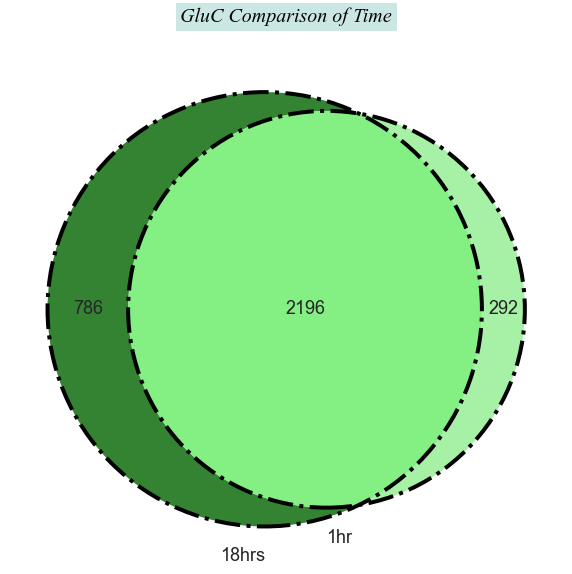

In [96]:
x=set(GluC18_50_coverage.Gene)
x2=set(GluC1_50_coverage.Gene)
vd2=venn2([x, x2],set_labels=('18hrs', '1hr'),set_colors=('darkgreen', 'lightgreen'), alpha = 0.8)
venn2_circles([x,x2], linestyle='-.', linewidth=4, color='black')
for text in vd2.set_labels:
 text.set_fontsize(18);
for text in vd2.subset_labels:
 text.set_fontsize(18)
plt.title('GluC Comparison of Time',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.show()

## Protein List Comparisons

In [97]:
milk=[set(Tryp18_50_coverage.Protein), set(AspN18_50_coverage.Protein), set(GluC18_50_coverage.Protein)]
cookies=set(Tryp1_50_coverage.Protein) | set(GluC1_50_coverage.Protein)
cake=set(Tryp1_50_coverage.Protein) & set(AspN1_50_coverage.Protein) & set(GluC1_50_coverage.Protein)
check=set(Tryp18_50_coverage.Protein) ^ set(AspN18_50_coverage.Protein) ^ set(GluC18_50_coverage.Protein)
x=len(cookies)
y=len(cake)
print(len(cookies))
print(len(cake))
print(len(check))

4357
1895
3466


In [98]:
xx=len(set().union(*milk))
z=set(AspN1_50_coverage.Protein)
zz=z.difference(cookies)
zzz=cookies.difference(z)
print(xx-y)
print(len(zz))
print(len(zzz))


2776
307
1109


In [99]:
cake=set(Tryp1_50_coverage.Protein) | set(AspN1_50_coverage.Protein) | set(GluC1_50_coverage.Protein)
cookies=set(Tryp18_50_coverage.Protein) | set(AspN18_50_coverage.Protein) | set(GluC18_50_coverage.Protein)
check1=cookies.difference(cake)
check2=cake.difference(cookies)
check3=cookies&cake
print(len(check1))
print(len(check2))
print(len(check3))

439
432
4232


In [100]:
list(set(Tryp1_50_coverage.Protein) ^ set(AspN1_50_coverage.Protein) ^ set(GluC1_50_coverage.Protein))

['P46934',
 'Q9NXR5',
 'Q9NRW1',
 'Q8IUF1',
 'Q32MZ4',
 'P82664',
 'Q01469',
 'Q9Y314',
 'P49916',
 'Q8TAE6',
 'Q15365',
 'Q9NWZ5',
 'P63165',
 'P12814',
 'O43432',
 'Q9Y6K9',
 'Q9NVI7',
 'O95831',
 'Q3MHD2',
 'Q9BQ52',
 'Q9Y618',
 'P04921',
 'Q92896',
 'Q8TAM6',
 'Q9NYZ3',
 'O14737',
 'Q96S82',
 'Q9Y2Q9',
 'P15104',
 'P13647',
 'P08238',
 'A6NHL2',
 'Q9NXJ5',
 'Q9Y6D6',
 'Q9NWU2',
 'Q9P2M4',
 'Q16740',
 'Q6VN20',
 'P27824',
 'P08134',
 'O95218',
 'P53597',
 'Q96BM9',
 'Q9Y6V7',
 'O60739',
 'O75688',
 'Q15542',
 'O95678',
 'Q6UVJ0',
 'Q9BXU7',
 'O75157',
 'Q96CS2',
 'P55809',
 'E9PRG8',
 'Q3ZCQ8',
 'Q9NYF8',
 'O60684',
 'P55786',
 'Q15020',
 'Q02978',
 'P25786',
 'Q9NNX9',
 'O95429',
 'Q8N2F6',
 'O76071',
 'P56192',
 'Q9H8M2',
 'Q96I15',
 'Q9H3N1',
 'O94788',
 'P30154',
 'Q96A49',
 'Q969U7',
 'Q96PZ0',
 'Q8TD16',
 'Q6ZSJ8',
 'P41236',
 'Q96I99',
 'Q9ULW0',
 'Q9GZZ1',
 'Q6P996',
 'Q14203',
 'Q92882',
 'P00338',
 'O00267',
 'P04080',
 'P05423',
 'P80297',
 'Q9UM54',
 'Q99607',
 'Q9Y2W2',

In [101]:
Ds = set(Tryp18_50_coverage.Protein)
Es = set(AspN18_50_coverage.Protein)
Fs = set(GluC18_50_coverage.Protein)

unique=len((Ds ^ Es ^ Fs) ^ (Ds & Es & Fs))
unique

1194

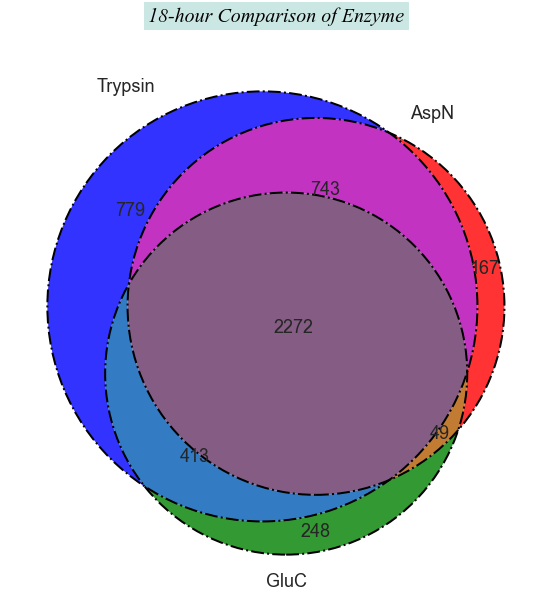

In [104]:
plt.figure(figsize=(10,10))
vd3=venn3([Ds,Es,Fs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([Ds,Es,Fs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
plt.title('18-hour Comparison of Enzyme',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

In [105]:
As = set(Tryp1_50_coverage.Gene)
Bs = set(AspN1_50_coverage.Gene)
Cs = set(GluC1_50_coverage.Gene)

unique=len((As ^ Bs ^ Cs) ^ (As & Bs & Cs))
unique

1243

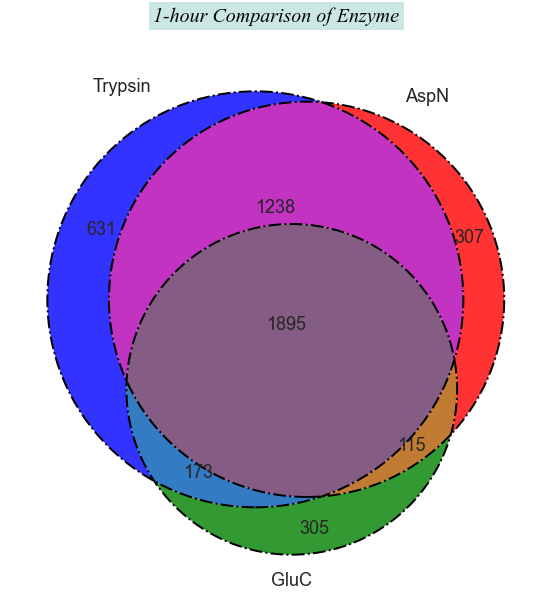

In [106]:
plt.figure(figsize=(10,10))
vd3=venn3([As,Bs,Cs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
plt.title('1-hour Comparison of Enzyme',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
# plt.savefig('1hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

In [107]:
Xs=As|Ds
Ys=Bs|Es
Zs=Cs|Fs

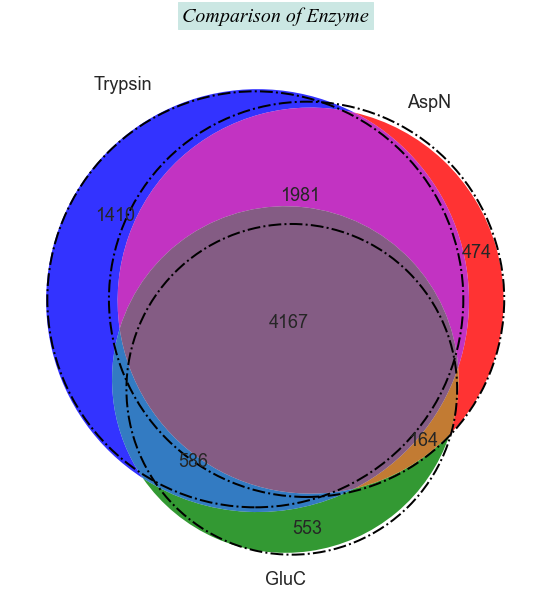

In [108]:
plt.figure(figsize=(10,10))
vd3=venn3([Xs,Ys,Zs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
plt.title('Comparison of Enzyme',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
# plt.savefig('1hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

## Extra Analyses

In [109]:
#Dataframe for Coverages
coverage = [Tryp1_50_coverage.AvgCoverage,Tryp18_50_coverage.AvgCoverage,AspN1_50_coverage.AvgCoverage,AspN18_50_coverage.AvgCoverage,GluC1_50_coverage.AvgCoverage,GluC18_50_coverage.AvgCoverage]
xx = pd.concat([i for i in coverage], axis=1)
xx.columns = ['Trypsin_1hr', 'Trypsin_18hrs','AspN_1hr','AspN_18hrs','GluC_1hr','GluC_18hrs']
df1 = xx.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
df1

,Digest,Coverage
0,Trypsin_1hr,79.0
1,Trypsin_18hrs,59.0
2,AspN_1hr,84.0
3,AspN_18hrs,88.5
4,GluC_1hr,51.5
...,...,...
20395,AspN_1hr,0.5
20396,GluC_1hr,0.5
20397,GluC_18hrs,0.5
20398,AspN_1hr,1.5


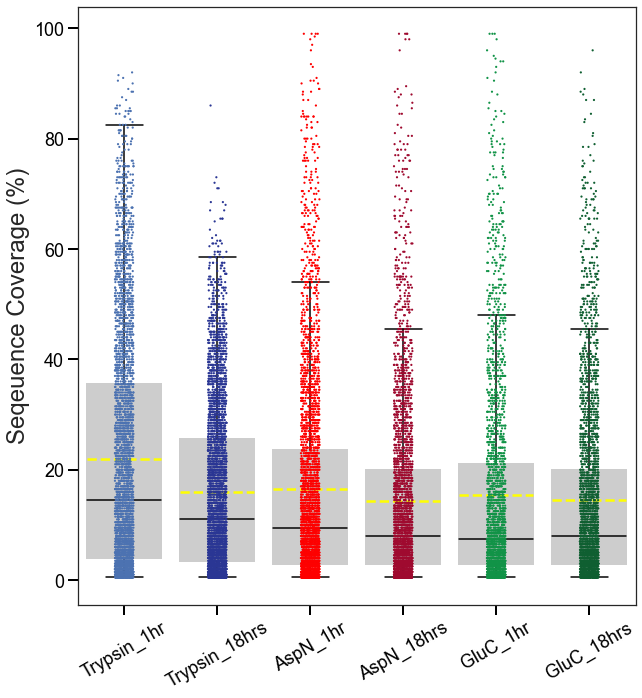

In [110]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=xx,palette=colors,s=2.2)
sns.boxplot(data=xx,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Seqeuence Coverage (%)",fontsize=24)
plt.xticks(fontsize=18,rotation=30)
plt.yticks(fontsize=18)
plt.savefig('Coverage',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

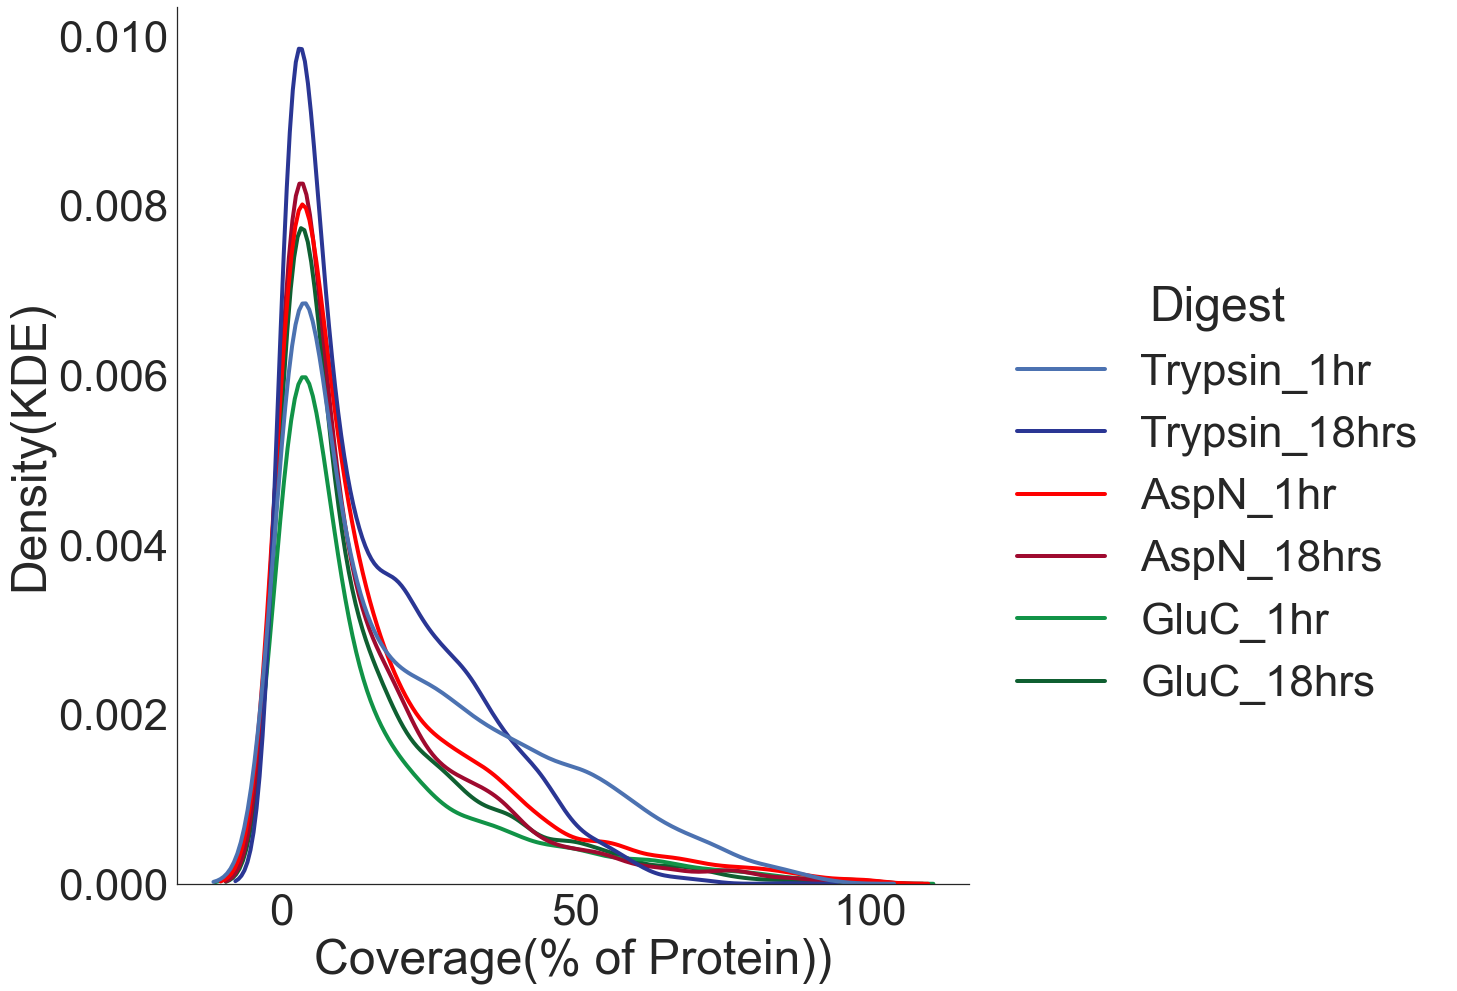

In [111]:
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage", hue="Digest",
    kind="kde", height=15,log_scale=(0,0),palette=colors,linewidth=4
    
)
plt.xlabel('Coverage(% of Protein))', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
# plt.title('Kernel Density Estimation of Sequence Coverage',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
g.savefig("Coverage.eps",dpi=600)

# Section 3: Peptide vs Protein Comparisons

## Analyzing Proteins with > 2 Peptides 

In [139]:
list1=[T1_x2,T18_x2,A1_x2,A18_x2,G1_x2,G18_x2]
list2=[Tryp1_50_coverage,Tryp18_50_coverage,AspN1_50_coverage,AspN18_50_coverage,GluC1_50_coverage,GluC18_50_coverage]
list3=[T1_50_pep,T18_50_pep,A1_50_pep,A18_50_pep,G1_50_pep,G18_50_pep]
labels=["T1","T18","A1","A18","G1","G18"]

for pep,frame,label in zip(list1,list2,labels):
    x=str(label+"_2pep")
    y2 =pep['Protein'].astype(str).values.tolist()
    globals()[x] = frame[frame['Protein'].isin(y2)]

    

In [140]:
T1_2pep

,Protein ID,Protein,Gene,Avg. Mass,Score (%),-10lgP,Coverage (%),#Peptides,Coverage (%) Tryp_1hr_1:50_Rep1,Coverage (%) Tryp_1hr_1:50_Rep2,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Spec Tryp_1hr_1:50_Rep1,#Spec Tryp_1hr_1:50_Rep2,AvgCoverage,MaxCoverage
0,42,P08238,HS90B_HUMAN,83264,99.2,598.83,99,226,78,80,1.846700e+10,2.327600e+10,1709,1743,79.0,80
1,73,P07900,HS90A_HUMAN,84660,99.2,576.52,98,206,68,73,1.357300e+10,1.764600e+10,1296,1379,70.5,73
2,297,P21333,FLNA_HUMAN,280737,99.2,570.59,87,274,52,60,3.714400e+09,5.141600e+09,419,452,56.0,60
3,402,P49327,FAS_HUMAN,273424,99.2,563.63,83,221,60,65,7.284100e+09,9.653600e+09,651,606,62.5,65
4,5,P06733,ENOA_HUMAN,47169,99.2,557.08,100,124,79,86,3.401900e+10,3.857000e+10,1114,958,82.5,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,4075,Q9H0H5,RGAP1_HUMAN,71027,98.9,61.96,5,3,1,1,5.326600e+06,2.967700e+06,1,1,1.0,1
4262,3921,Q13322,GRB10_HUMAN,67231,99.0,60.60,5,3,2,4,1.141000e+06,5.119000e+06,1,3,3.0,4
4265,3856,Q9Y4P3,TBL2_HUMAN,49798,99.0,60.46,8,3,3,5,1.520500e+06,5.506200e+06,1,2,4.0,5
4299,18997,P00846,ATP6_HUMAN,24817,61.7,57.65,4,1,4,4,4.082800e+07,4.760500e+07,4,3,4.0,4


In [141]:
xx=[T18_2pep.AvgCoverage,T1_2pep.AvgCoverage,A18_2pep.AvgCoverage,A1_2pep.AvgCoverage,G18_2pep.AvgCoverage,G1_2pep.AvgCoverage]
cov=[]
cov=pd.concat([i for i in xx], axis=1)
cov.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']

### Sequence Coverage KDE

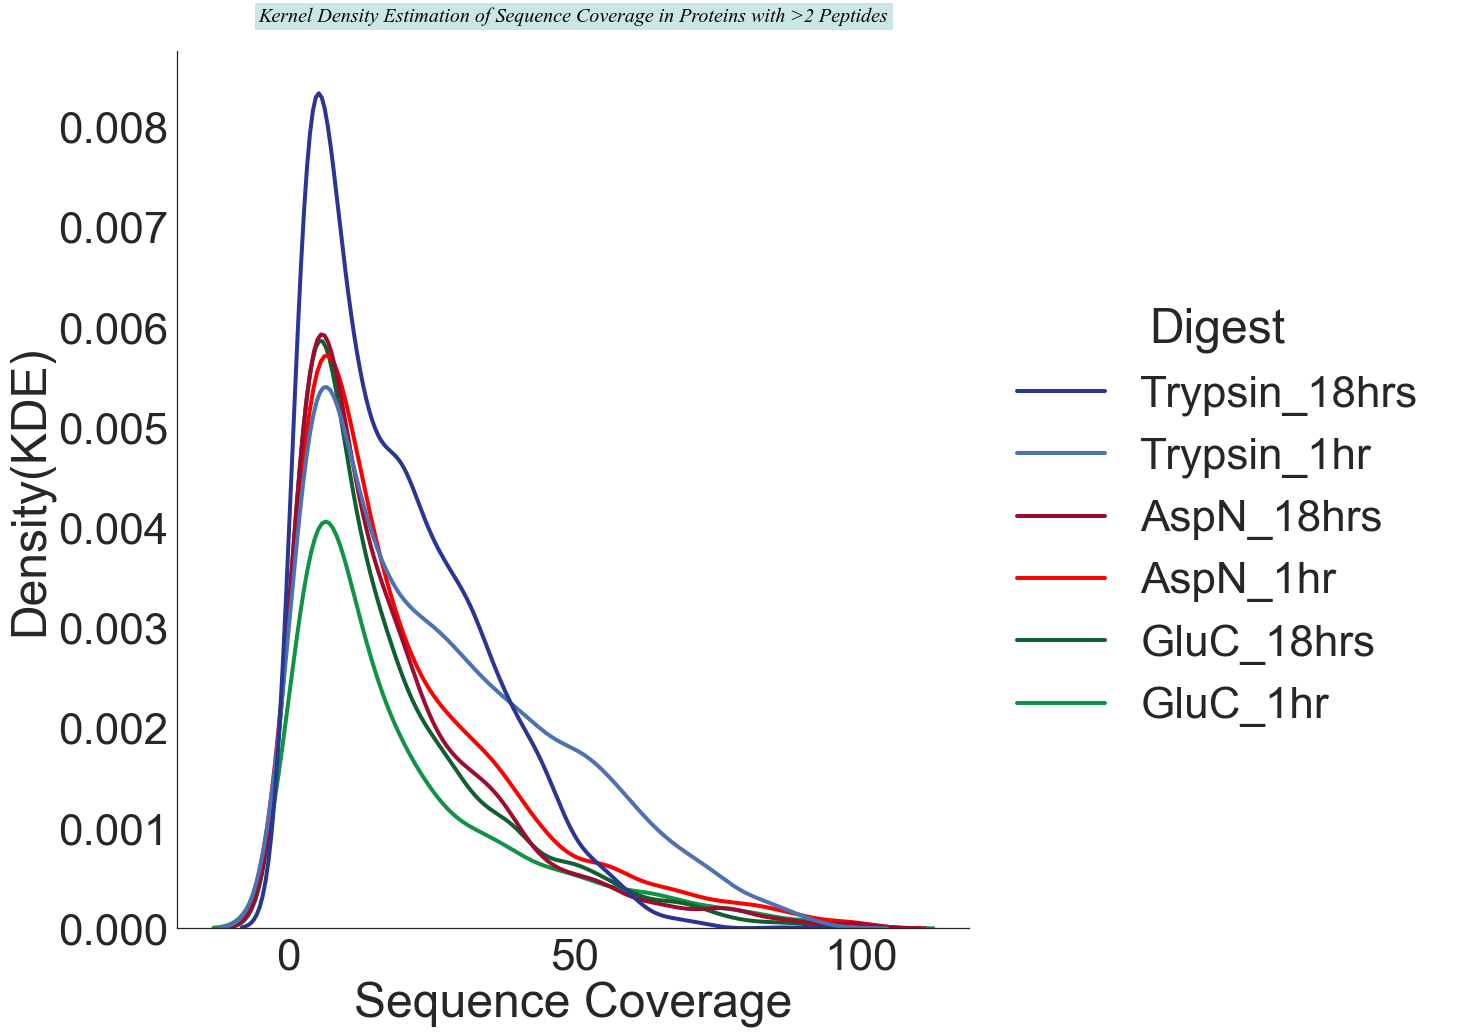

In [142]:
df1 = cov.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage", hue="Digest",
    kind="kde", height=15,log_scale=(0,0),palette=colors,linewidth=4
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Kernel Density Estimation of Sequence Coverage in Proteins with >2 Peptides',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
g.savefig("Coverage_2pep.eps")

### Sequence Coverage Box & Bar Graph

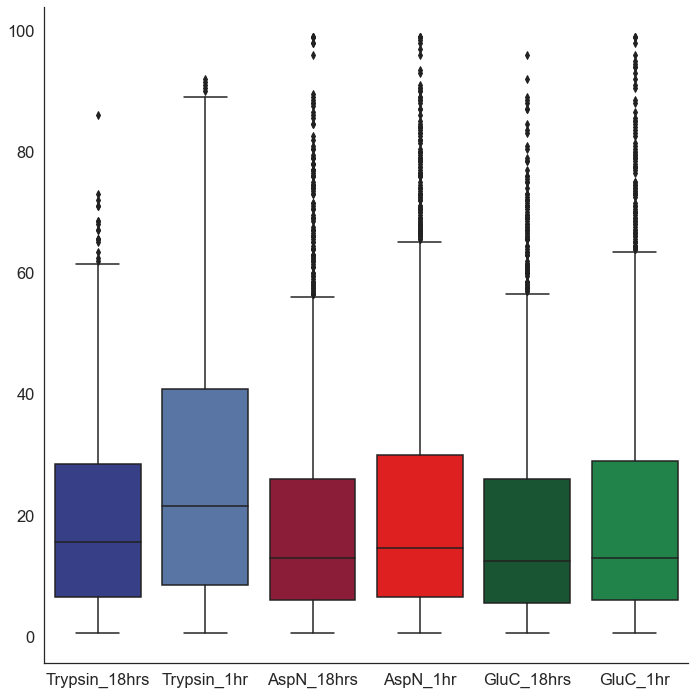

In [143]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.catplot(data=cov,height=10, kind='box', palette=colors)
# plt.savefig("Charge_boxen.eps", dpi=dpi)

### Average Mass KDE

In [144]:
grab="Avg. Mass"
xx=[T18_2pep[grab],T1_2pep[grab],A18_2pep[grab],A1_2pep[grab],G18_2pep[grab],G1_2pep[grab]]
mass=[]
mass=pd.concat([i for i in xx], axis=1)
mass.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']

Text(97.2761201388889, 0.5, 'Density(KDE)')

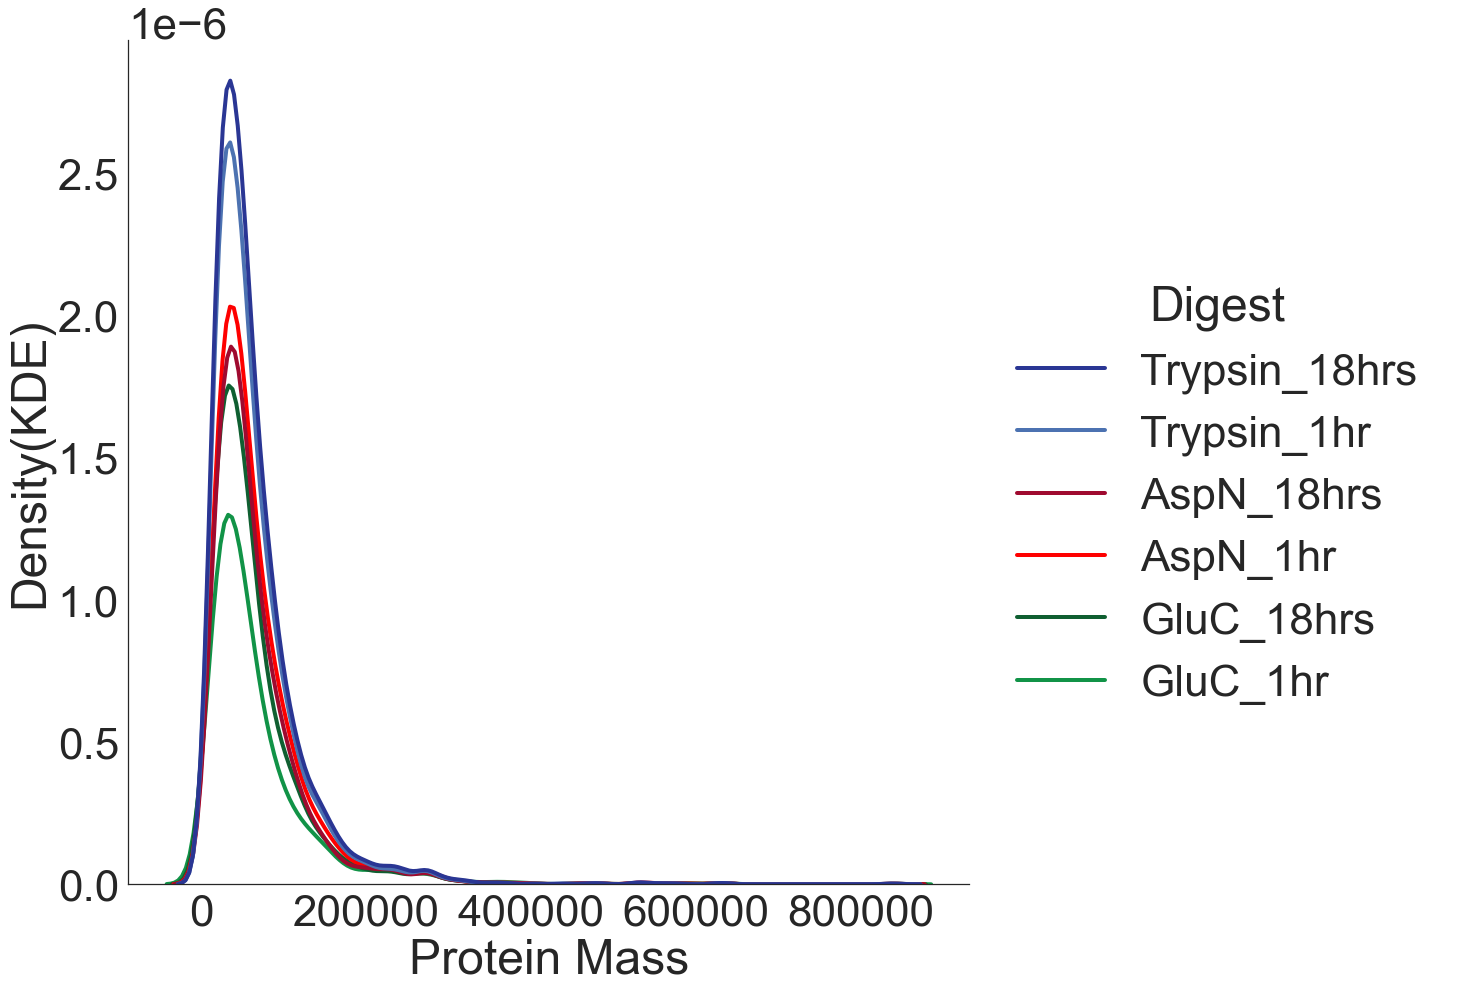

In [145]:
df1 = mass.stack().reset_index()
df1.columns = ['Null','Digest','Mass']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Mass", hue="Digest",
    kind="kde", height=15,log_scale=(0,0),palette=colors,linewidth=4
    
)
plt.xlabel('Protein Mass', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
# g.savefig("Hydro.eps")

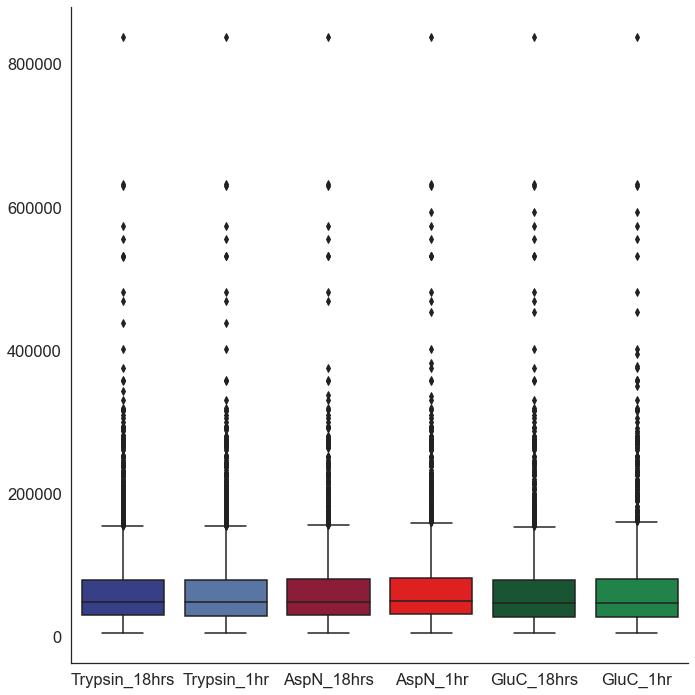

In [146]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.catplot(data=mass,height=10, kind='box', palette=colors)
# plt.savefig("Charge_boxen.eps", dpi=dpi)

In [147]:
As = set(T1_2pep.Gene)
Bs = set(A1_2pep.Gene)
Cs = set(G1_2pep.Gene)

unique=len((As ^ Bs ^ Cs) ^ (As & Bs & Cs))
unique

998

### Venn Diagram of 1h Digestion

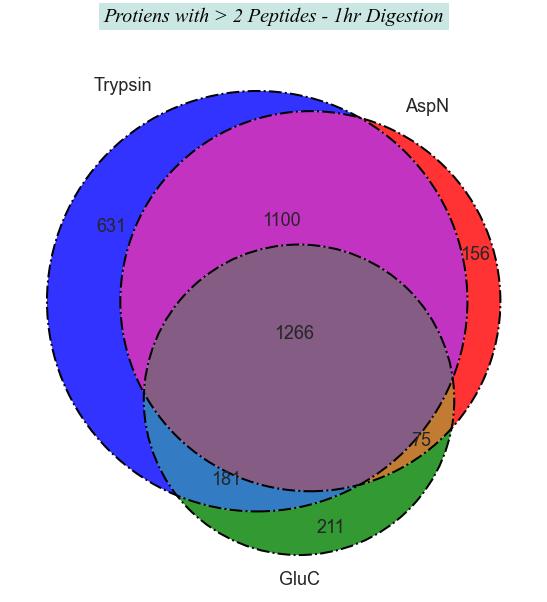

In [148]:
plt.figure(figsize=(10,10))
vd3=venn3([As,Bs,Cs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
plt.title('Protiens with > 2 Peptides - 1hr Digestion',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

### Venn Diagram of 18h Digestion

In [149]:
As = set(T18_2pep.Gene)
Bs = set(A18_2pep.Gene)
Cs = set(G18_2pep.Gene)

unique=len((As ^ Bs ^ Cs) ^ (As & Bs & Cs))
unique

1041

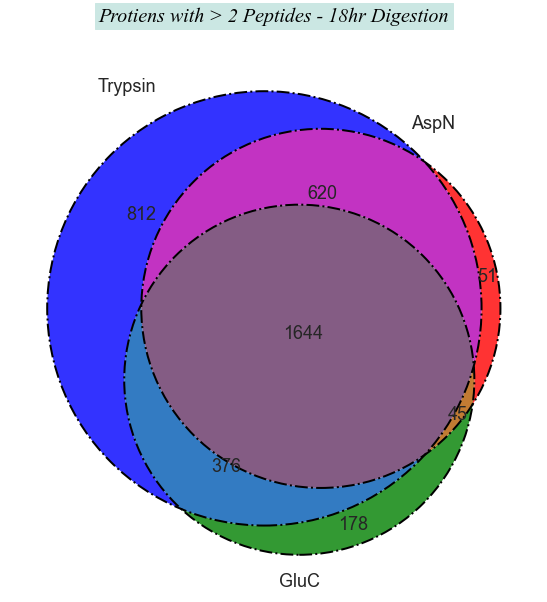

In [150]:
plt.figure(figsize=(10,10))
vd3=venn3([As,Bs,Cs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
plt.title('Protiens with > 2 Peptides - 18hr Digestion',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

## Analyzing Proteins with <2 Peptides

In [151]:
list1=[T1_x3,T18_x3,A1_x3,A18_x3,G1_x3,G18_x3]
list2=[Tryp1_50_coverage,Tryp18_50_coverage,AspN1_50_coverage,AspN18_50_coverage,GluC1_50_coverage,GluC18_50_coverage]
labels=["T1","T18","A1","A18","G1","G18"]

for pep,frame,label in zip(list1,list2,labels):
    x=str(label+"_1pep")
    y2 =pep['Protein'].astype(str).values.tolist()
    globals()[x] = frame[frame['Protein'].isin(y2)]

In [152]:
for item in list1:
    print(len(item))

498
745
953
880
745
729


In [153]:
T1_x2

,Protein,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature Trypsin_18hr_1:50_Rep2,Protein ID,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z,counts
0,A0A0B4J2D5,5.265547e+07,1.190207e+07,1.000000,0.555556,1531.0,1813.034467,135.308889,99.533333,631.090211,2.777778,17.111111,6.855496,-0.079744,-0.222222,13
1,A0A1B0GUS4,2.461900e+08,8.043314e+06,1.428571,0.142857,2478.0,2165.191043,185.827857,99.842857,808.472679,2.714286,19.142857,5.571309,-0.408880,-1.142857,13
2,A0AVT1,2.687987e+07,1.301127e+07,0.787879,0.787879,677.0,1496.997055,132.290303,99.890909,614.522612,2.454545,13.030303,7.081155,-0.143922,0.000000,38
4,A0MZ66,5.553889e+06,3.917011e+06,0.333333,0.777778,1305.0,1235.652067,116.168889,99.422222,563.284544,2.222222,10.666667,5.729237,-0.253093,-1.000000,6
5,A2RRP1,2.873436e+06,3.064482e+06,0.363636,0.727273,1806.0,1366.914218,166.106364,99.845455,585.064464,2.363636,12.000000,8.297206,0.254002,0.454545,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,Q9Y6K9,6.484500e+06,7.472200e+06,0.250000,1.250000,1387.0,1471.538050,128.525000,99.850000,662.697200,2.250000,12.500000,5.726328,-0.455821,-1.000000,2
3669,Q9Y6M1,6.112946e+07,2.325188e+07,0.769231,0.615385,1096.0,1480.226377,129.988462,99.892308,708.925923,2.076923,13.384615,7.033901,-0.100327,-0.230769,12
3670,Q9Y6M9,8.419800e+06,8.764520e+06,0.400000,0.800000,1997.0,1509.475240,125.598000,99.880000,623.351760,2.400000,12.000000,6.453166,-1.303013,-1.000000,5
3671,Q9Y6R4,3.418575e+06,1.495775e+06,0.500000,0.500000,2179.0,1272.380900,117.222500,99.825000,637.197325,2.000000,10.750000,5.421377,-0.517841,-0.750000,6


In [154]:
xx=[T18_1pep.AvgCoverage,T1_1pep.AvgCoverage,A18_1pep.AvgCoverage,A1_1pep.AvgCoverage,G18_1pep.AvgCoverage,G1_1pep.AvgCoverage]
cov=[]
cov=pd.concat([i for i in xx], axis=1)
cov.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']

### Sequence Coverage KDE

Text(72.7761201388889, 0.5, 'Density(KDE)')

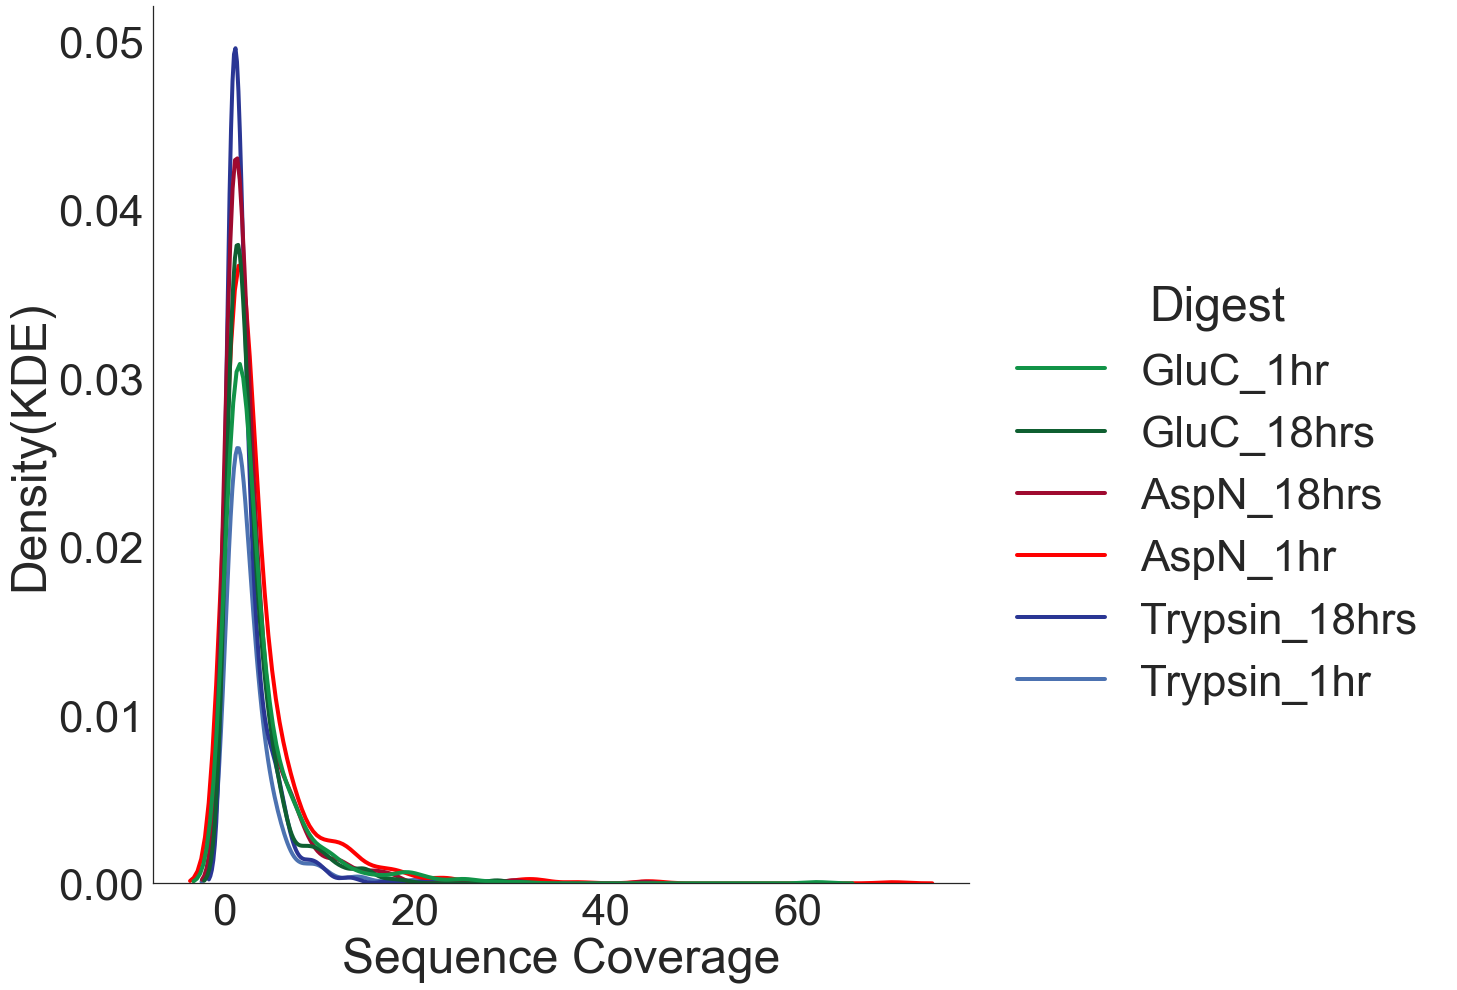

In [155]:
df1 = cov.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage", hue="Digest",
    kind="kde", height=15,log_scale=(0,0),palette=colors, linewidth=4
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
# g.savefig("Hydro.eps")

### Sequence Coverage Box & Bar Graph

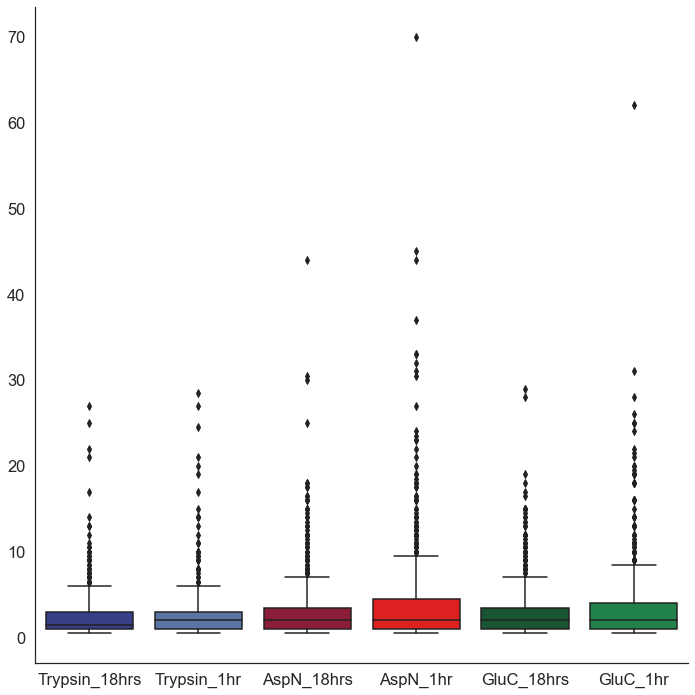

In [156]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.catplot(data=cov,height=10, kind='box',palette=colors)
# plt.savefig("Charge_boxen.eps", dpi=dpi)

### Average Mass KDE

In [157]:
grab="Avg. Mass"
xx=[T18_1pep[grab],T1_1pep[grab],A18_1pep[grab],A1_1pep[grab],G18_1pep[grab],G1_1pep[grab]]
mass=[]
mass=pd.concat([i for i in xx], axis=1)
mass.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']

Text(97.2761201388889, 0.5, 'Density(KDE)')

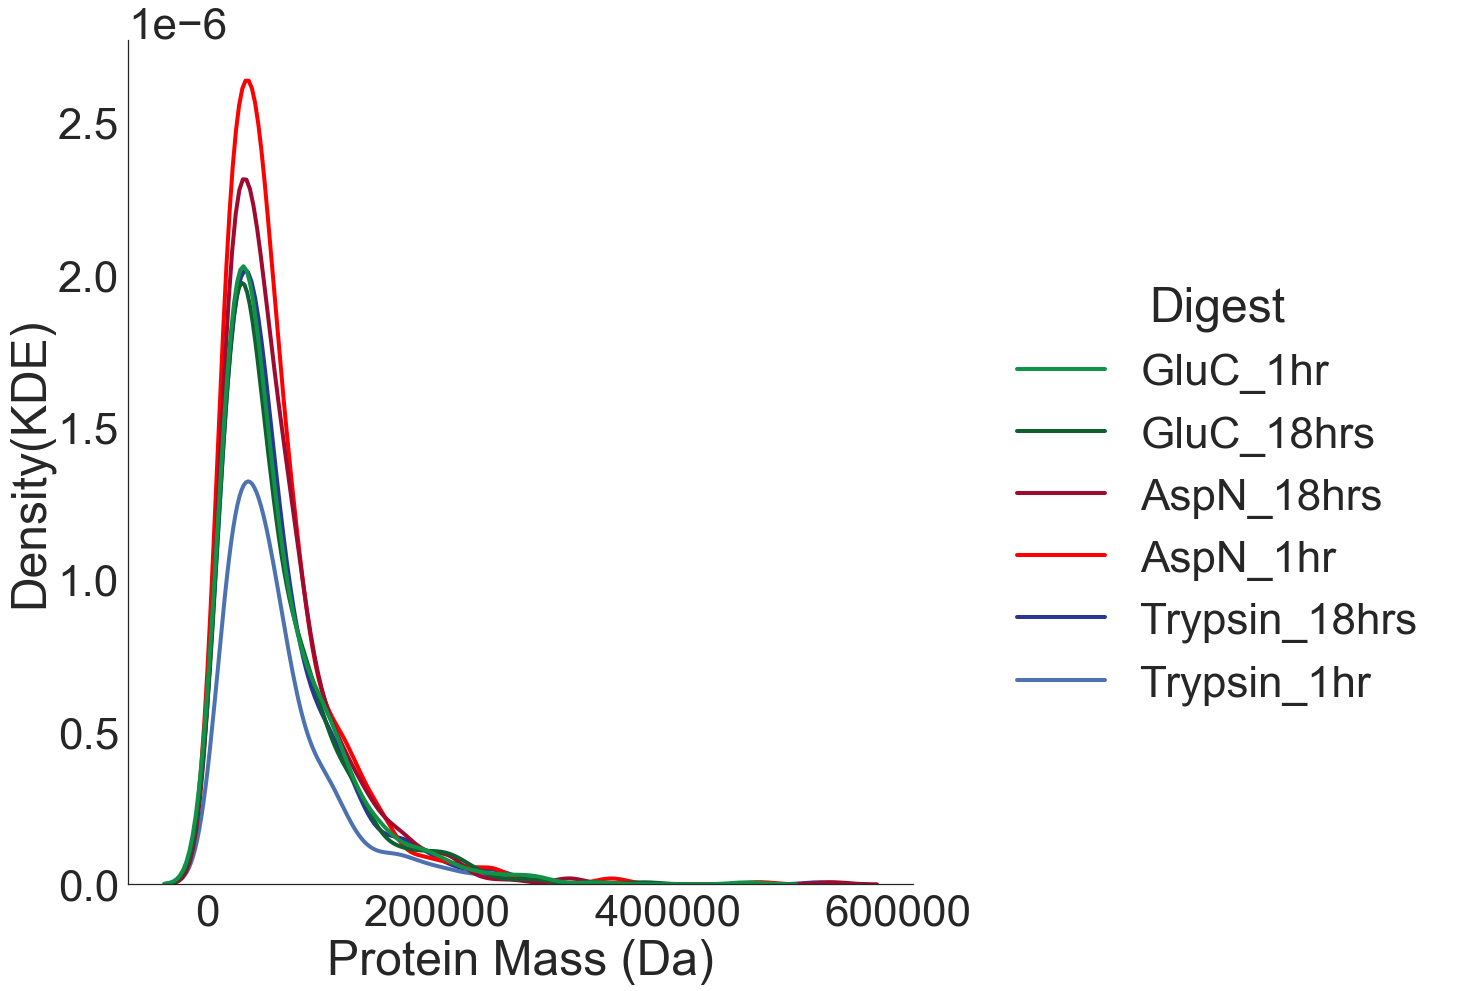

In [158]:
df2 = mass.stack().reset_index()
df2.columns = ['Null','Digest','Mass']
df2.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df2,
    x="Mass", hue="Digest",
    kind="kde", height=15,log_scale=(0,0),palette=colors,linewidth=4
    
)
plt.xlabel('Protein Mass (Da)', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
# g.savefig("Hydro.eps")

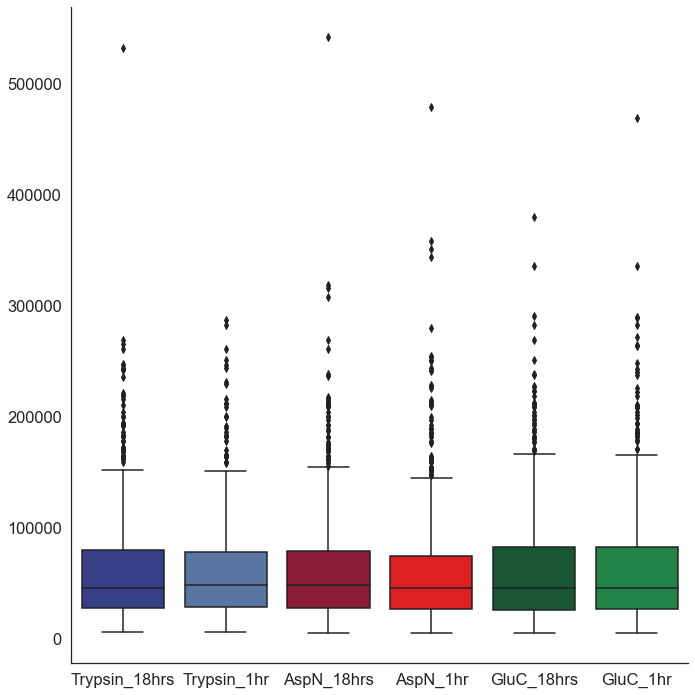

In [159]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.catplot(data=mass,height=10, kind='box', palette=colors)
# plt.savefig("Charge_boxen.eps", dpi=dpi)

### Venn Diagram of 1h Digestion

In [160]:
As = set(T1_1pep.Gene)
Bs = set(A1_1pep.Gene)
Cs = set(G1_1pep.Gene)

unique=len((As ^ Bs ^ Cs) ^ (As & Bs & Cs))
unique

1648

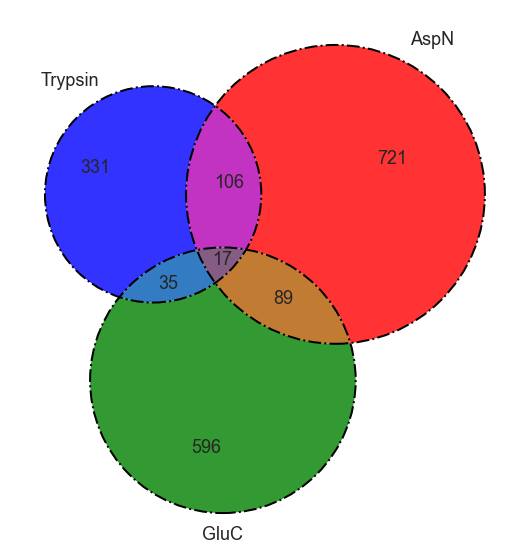

In [161]:
plt.figure(figsize=(10,10))
vd3=venn3([As,Bs,Cs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

### Venn Diagram of 18h Digestion

In [162]:
As = set(T18_1pep.Gene)
Bs = set(A18_1pep.Gene)
Cs = set(G18_1pep.Gene)

unique=len((As ^ Bs ^ Cs) ^ (As & Bs & Cs))
unique

1628

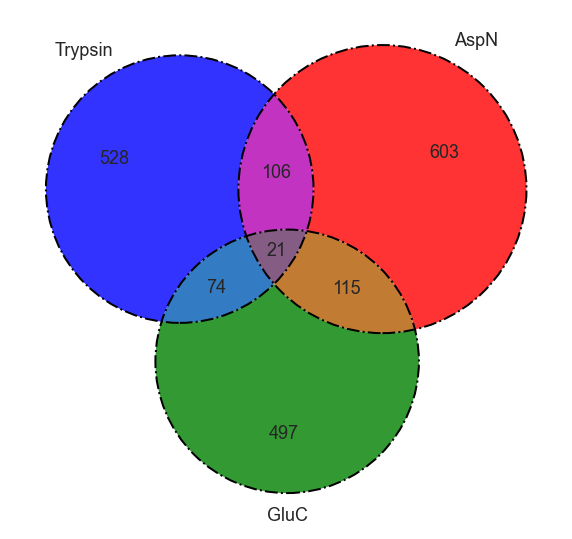

In [163]:
plt.figure(figsize=(10,10))
vd3=venn3([As,Bs,Cs],
 set_labels=('Trypsin', 'AspN','GluC'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

## Analyzing Peptides of Proteins with >75% Sequence Coverage and >2 peptides

In [164]:
T1_50_pep

,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Feature Tryp_1hr_1:50_Rep1,#Feature Tryp_1hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
0,1.180000e+09,1.176400e+09,17,17,42,P08238,HNDDEQYAWESSAGGSFTVRA,HS90B,2254.9514,136.17,100.0,1128.4834,2,20,4.100537,-1.066667,-3.0
1,1.432000e+09,2.016000e+09,6,5,42,P08238,RYHTSQSGDEMTSLSEYVSRM,HS90B,2175.9377,127.21,100.0,1088.9771,2,19,5.384736,-1.085714,-1.0
2,2.262100e+09,3.040500e+09,13,23,42,P08238,VILHLKEDQTEYLEERR,HS90B,2014.0371,113.76,100.0,1008.0255,2,16,4.825283,-1.117647,-2.0
3,2.261400e+09,2.755000e+09,6,3,42,P08238,HLEINPDHPIVETLRQ,HS90B,1781.9424,122.25,100.0,446.4927,4,15,5.219443,-0.718750,-2.0
4,0.000000e+00,4.366200e+06,0,2,42,P08238,MPEEVHHGEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRE,HS90B,4708.3159,250.54,99.9,1178.0920,4,40,4.214971,-0.200000,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48150,0.000000e+00,5.101500e+06,0,1,10868,Q9NQ69,TLTTGDHFGMKDSLVYCRA,LHX9,2099.9768,134.32,97.2,526.0063,4,18,7.146357,-0.147368,0.0
48151,0.000000e+00,5.004300e+05,0,1,15608,Q6NW34,INVQNNVDLGQPVKN,NEPRO,1536.8259,94.88,97.1,769.4198,2,14,6.707490,-0.633333,0.0
48152,2.150400e+05,0.000000e+00,1,0,8222,Q9UK58,RILGCELIQAAGILLRL,CCNL1,1638.9491,240.22,96.8,547.3246,3,15,8.931084,1.282353,1.0
48153,0.000000e+00,2.212300e+06,0,1,11575,Q96Q83,RTVYPDPRG,ALKB3,846.4235,56.83,97.0,424.2243,2,7,9.808818,-1.544444,1.0


In [165]:
# Select Threshold of Sequence Coverage
sq = 80.0
list1=[T1_50_pep,T18_50_pep,A1_50_pep,A18_50_pep,G1_50_pep,G18_50_pep]
list2=[Tryp1_50_coverage,Tryp18_50_coverage,AspN1_50_coverage,AspN18_50_coverage,GluC1_50_coverage,GluC18_50_coverage]
labels=["T1","T18","A1","A18","G1","G18"]
num_pro_all=[]
for pep,frame,label in zip(list1,list2,labels):
    num=str(int(sq))
    x=str(label+"_"+num+"_2pep")
    zz=frame.loc[(frame['AvgCoverage']) >= float(sq)]
    y2 =zz['Protein'].astype(str).values.tolist()
    num_pro_all.append(len(y2))
    globals()[x] = pep[pep["Protein"].isin(y2)]

In [166]:
zebra=T1_80_2pep.groupby(['Protein'], as_index=False).mean()
print(len(zebra))
print(len(T1_80_2pep))
print(num_pro_all)

42
2344
[42, 1, 45, 23, 29, 12]


In [167]:
grouping = ['Protein']

T18x_Counts=T18_80_2pep.groupby(grouping).size().reset_index(name='counts')
T1x_Counts=T1_80_2pep.groupby(grouping).size().reset_index(name='counts')
A18x_Counts=A18_80_2pep.groupby(grouping).size().reset_index(name='counts')
A1x_Counts=A1_80_2pep.groupby(grouping).size().reset_index(name='counts')
G18x_Counts=G18_80_2pep.groupby(grouping).size().reset_index(name='counts')
G1x_Counts=G1_80_2pep.groupby(grouping).size().reset_index(name='counts')

In [168]:
list1=[T1_50_pep,T18_50_pep,A1_50_pep,A18_50_pep,G1_50_pep,G18_50_pep]
list2=[T1x_Counts,T18x_Counts,A1x_Counts,A18x_Counts,G1x_Counts,G18x_Counts]
labels=["T1","T18","A1","A18","G1","G18"]
num_pro=[]
for frame,item, label in zip(list1,list2,labels):
    x=str(label+"_MaxPro")
    temp=frame.groupby(['Protein'], as_index=False).mean()
    globals()[x]=pd.merge(temp, item, on="Protein")
    globals()[x]= globals()[x].loc[(globals()[x]['counts']) > 1]
    num_pro.append(globals()[x])
print(num_pro_all)

[42, 1, 45, 23, 29, 12]


In [169]:
T1_MaxPro

,Protein,Area Tryp_1hr_1:50_Rep1,Area Tryp_1hr_1:50_Rep2,#Feature Tryp_1hr_1:50_Rep1,#Feature Tryp_1hr_1:50_Rep2,Protein ID,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z,counts
0,P00338,1.526440e+08,2.209882e+08,1.490909,1.127273,147.0,1913.000884,146.966727,99.910909,708.984984,2.709091,17.036364,6.267221,-0.154888,-0.654545,55
1,P00441,5.624861e+07,1.226965e+08,0.777778,1.148148,1941.0,2398.962785,124.832222,99.870370,713.990515,3.296296,22.814815,5.975220,-0.441024,-0.814815,27
2,P00558,1.500793e+08,1.695673e+08,1.370968,1.016129,45.0,1785.415221,132.079032,99.896774,702.823344,2.532258,16.274194,6.927916,-0.074217,-0.177419,62
3,P02008,6.034196e+08,6.060331e+08,1.625000,1.250000,2085.0,1496.215363,138.218125,99.925000,682.752544,2.187500,13.437500,7.397527,0.280028,0.000000,16
4,P02100,2.310874e+08,2.316033e+08,1.320000,0.840000,2921.0,1480.392972,119.805200,99.856000,625.858560,2.440000,13.240000,8.197260,-0.019679,0.240000,25
5,P04075,2.984304e+08,3.099134e+08,1.851064,1.127660,11.0,2291.648339,130.882128,99.859574,758.640611,3.010638,20.925532,7.028109,-0.417286,-0.074468,94
6,P04406,2.904766e+08,3.424707e+08,1.570000,1.600000,50.0,2330.901441,163.073900,99.876000,751.752451,3.110000,21.190000,7.447110,0.029530,-0.060000,100
7,P04792,4.526056e+07,7.807431e+07,1.350000,1.050000,1031.0,1795.459065,122.714500,99.890000,685.281900,2.650000,16.300000,7.353151,-0.621641,-0.250000,20
8,P05387,8.652461e+07,9.853643e+07,0.944444,1.055556,2815.0,2072.694144,154.129444,99.905556,762.938511,2.777778,20.222222,5.518941,-0.042092,-1.166667,18
9,P05783,2.430630e+07,4.907664e+07,0.839286,0.964286,126.0,1958.728716,131.222500,99.787500,693.389445,2.732143,17.410714,6.968933,-0.610444,-0.500000,56


### Stacked Bar Plot

In [170]:
df = pd.DataFrame(columns=["Digest Time","Trypsin","AspN","GluC"], 
                  data=[["1hr",num_pro_all[0],num_pro_all[2],num_pro_all[4]],["18hr",num_pro_all[1],num_pro_all[3],num_pro_all[5]]])
df

,Digest Time,Trypsin,AspN,GluC
0,1hr,42,45,29
1,18hr,1,23,12


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


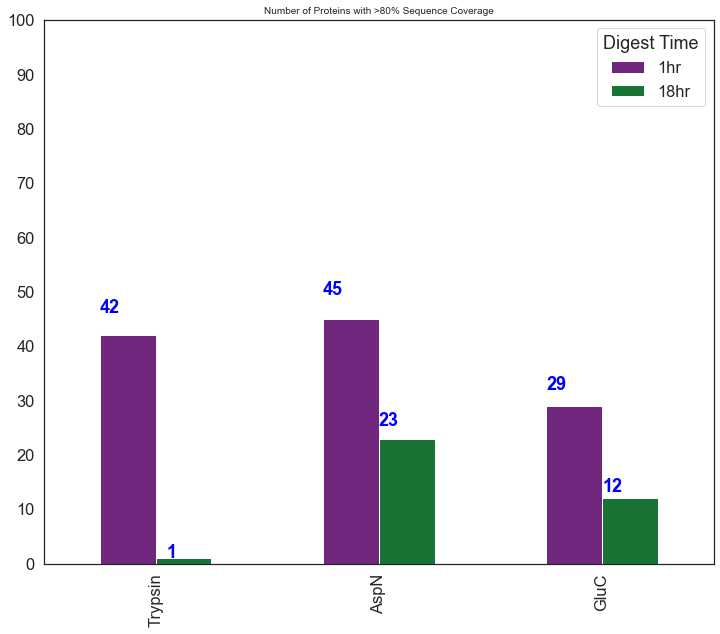

In [171]:
from matplotlib.colors import ListedColormap

ax=df.set_index('Digest Time')\
  .reindex(df.set_index('Digest Time').sum().index, axis=1)\
  .T.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("PRGn", 10)), 
          figsize=(12,10))
plt.yticks(np.arange(0,110,10))
positions=[-0.25,0.05,0.75,1,1.75,2]
for i,v in zip(positions,num_pro_all):
    ax.text(i, v+(0.1*v), str(v), color='blue', fontweight='bold')
plt.title("Number of Proteins with >80% Sequence Coverage",fontsize=10)
plt.savefig('Stacked_SequenceCoverage_Grouped_80',format=fmt,dpi=dpi,bbox_inches="tight")

### Venn Diagrams

In [172]:
As = set(T1_MaxPro.Protein)
Bs = set(A1_MaxPro.Protein)
Cs = set(G1_MaxPro.Protein)

unique=len((As ^ Bs ^ Cs) ^ (As & Bs & Cs))
unique

68

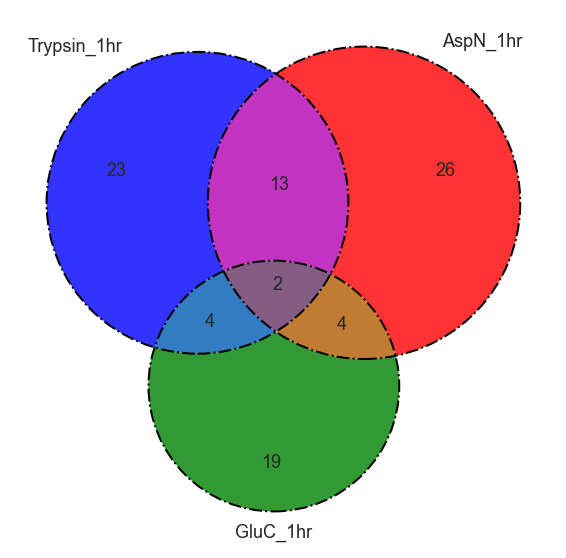

In [173]:
plt.figure(figsize=(10,10))
vd3=venn3([As,Bs,Cs],
 set_labels=('Trypsin_1hr', 'AspN_1hr','GluC_1hr'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

In [174]:
Ds = set(T18_MaxPro.Protein)
Es = set(A18_MaxPro.Protein)
Fs = set(G18_MaxPro.Protein)

print(list(Ds.difference(Es,Fs)))
print(list(As.difference(Ds)))
print(list(Ds.difference(As)))

unique=len((Ds ^ Es ^ Fs) ^ (Ds & Es & Fs))
unique

['P02008']
['P69891', 'P22626', 'P43686', 'Q99714', 'Q06830', 'P06733', 'P04406', 'P31939', 'P04075', 'P68363', 'P00441', 'P50395', 'P27797', 'P09211', 'P68371', 'P63261', 'P07437', 'P22392', 'P62937', 'P63244', 'P00558', 'P05387', 'P37802', 'Q15181', 'P35232', 'P02100', 'P46109', 'Q99497', 'P00338', 'P49773', 'Q9BQE3', 'P69892', 'P30086', 'P04792', 'P05783', 'P32119', 'P50990', 'P12829', 'P15531', 'P60709', 'P48643']
[]


32

AttributeError: 'NoneType' object has no attribute 'set_fontsize'

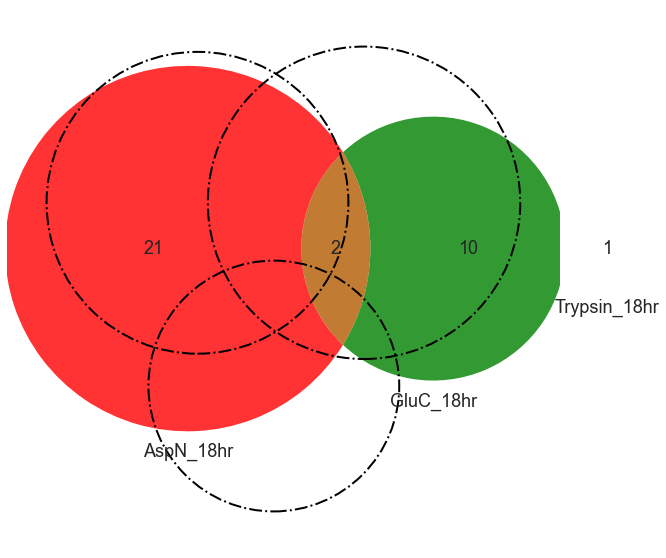

In [175]:
plt.figure(figsize=(10,10))
vd3=venn3([Ds,Es,Fs],
 set_labels=('Trypsin_18hr', 'AspN_18hr','GluC_18hr'),
 set_colors=('blue','red','green'), 
 alpha = 0.8)
venn3_circles([As,Bs,Cs], linestyle='-.', linewidth=2, color='black')
for text in vd3.set_labels:
 text.set_fontsize(18)
for text in vd3.subset_labels:
 text.set_fontsize(18)
# plt.savefig('18hr_Venn',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()

In [183]:
T18_80_2pep

,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature Trypsin_18hr_1:50_Rep2,Protein ID,Protein,Peptide,Gene,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
28279,6.259500e+09,2.654400e+09,3,3,2085,P02008,TYFPHFDLHPGSAQLRA,HBAZ,1884.9270,150.06,100.0,943.4702,2,16,7.877803,-0.441176,0.0
28280,2.475600e+09,1.360600e+09,7,2,2085,P02008,ISTQADTIGTETLERL,HBAZ,1633.8159,95.88,100.0,817.9150,2,15,3.884385,-0.256250,-2.0
28281,3.507100e+09,1.116000e+09,2,2,2085,P02008,RFPADFTAEAHAAWDKF,HBAZ,1675.7631,174.59,100.0,838.8884,2,15,5.308447,-0.464706,-1.0
28282,8.060700e+08,2.872400e+08,2,3,2085,P02008,LLSHCLLVTLAARF,HBAZ,1465.8439,240.31,100.0,733.9295,2,13,8.931084,1.635714,1.0
28283,1.411500e+09,0.000000e+00,3,0,2085,P02008,TYFPHFDLHPGSAQLRA,HBAZ,1885.9111,147.89,99.9,943.9645,2,16,7.877803,-0.441176,0.0
28284,5.414600e+08,0.000000e+00,2,0,2085,P02008,ISTQADTIGTETLERL,HBAZ,1634.7999,99.16,99.9,818.4080,2,15,3.884385,-0.256250,-2.0
28285,1.754100e+09,9.542100e+08,2,2,2085,P02008,LSELHAYILRV,HBAZ,1213.6819,117.39,99.9,607.8488,2,10,7.731514,0.781818,0.0
28286,1.025400e+09,5.532200e+08,3,3,2085,P02008,RTIIVSMWAKI,HBAZ,1047.5787,181.84,99.9,524.7964,2,9,11.535029,0.963636,2.0
28287,3.373000e+09,2.006400e+06,4,1,2085,P02008,FLSVVSSVLTEKY,HBAZ,1307.7336,170.48,99.9,654.8750,2,12,6.868408,0.861538,0.0
28288,1.728000e+09,1.245000e+09,1,1,2085,P02008,RVDPVNFKL,HBAZ,817.4333,57.71,99.9,409.7246,2,7,10.042881,-0.222222,1.0


In [184]:
grab="Hydro_Sum"
xx=[T18_80_2pep[grab],T1_80_2pep[grab],A18_80_2pep[grab],A1_80_2pep[grab],G18_80_2pep[grab],G1_80_2pep[grab]]
Gravy=[]
Gravy=pd.concat([i for i in xx], axis=1)
Gravy.columns = ['Trypsin_18hrs', 'Trypsin_1hr','AspN_18hrs','AspN_1hr','GluC_18hrs','GluC_1hr']

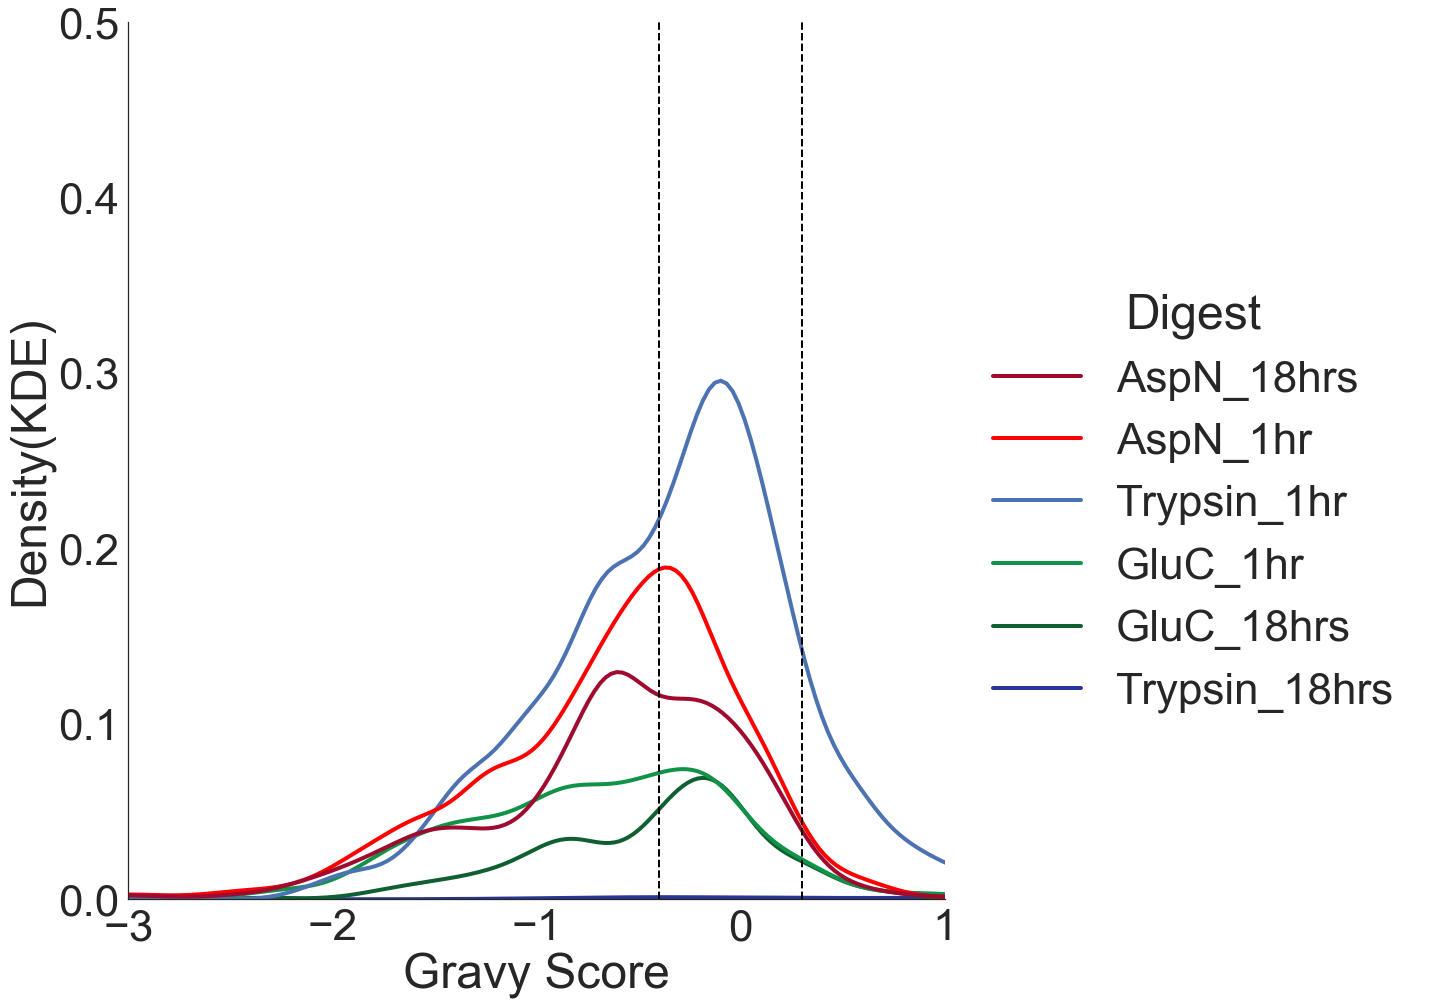

In [185]:
df2 = Gravy.stack().reset_index()
df2.columns = ['Null','Digest','Gravy']
df2.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df2,
    x="Gravy", hue="Digest",
    kind="kde", height=15,log_scale=(0,0),palette=colors,linewidth=4
    
)
g = (g.set_axis_labels("Gravy Score","Density(KDE)").
set(xlim=(-3,1),ylim=(0,0.5)))
plt.xlabel('Gravy Score', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.axvline(x=0.3, linestyle="--",color='black',linewidth=2)
plt.axvline(x=-0.4, linestyle="--",color='black',linewidth=2)
g.savefig("Gravy_80sq_2pep.eps")

In [186]:
T18_50_pep.loc[T18_50_pep.Protein == "P02008"].describe()

,Area Tryp_18hr_1:50_Rep1,Area Trypsin_18hr_1:50_Rep2,#Feature Tryp_18hr_1:50_Rep1,#Feature Trypsin_18hr_1:50_Rep2,Protein ID,Mass,RT,Score (%),m/z,z,Length,IPC,Hydro_Sum,Neutral_Z
count,1.600000e+01,1.600000e+01,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000
mean,1.795349e+09,6.768004e+08,2.250000,1.375000,2085.0,1286.983875,115.446250,99.925000,644.499394,2.0,11.437500,8.075438,0.188641,0.312500
std,1.593245e+09,7.757622e+08,1.570563,1.087811,0.0,361.675679,57.146644,0.044721,180.837948,0.0,3.161619,2.828569,0.776987,1.352467
min,4.681400e+07,0.000000e+00,1.000000,0.000000,2085.0,817.433300,46.910000,99.900000,409.724600,2.0,7.000000,3.884385,-0.772727,-2.000000
25%,7.399175e+08,1.504800e+06,1.000000,0.750000,2085.0,1059.574875,57.675000,99.900000,530.794225,2.0,9.000000,6.357729,-0.441176,-0.250000
50%,1.569750e+09,4.202300e+08,2.000000,1.000000,2085.0,1144.118800,101.740000,99.900000,573.066850,2.0,10.500000,7.877803,-0.222222,0.000000
75%,2.259300e+09,1.198875e+09,3.000000,2.000000,2085.0,1634.061900,155.165000,99.925000,818.038250,2.0,15.000000,10.415918,0.887063,1.250000
max,6.259500e+09,2.654400e+09,7.000000,3.000000,2085.0,1885.911100,240.310000,100.000000,943.964500,2.0,16.000000,11.535029,1.635714,2.000000


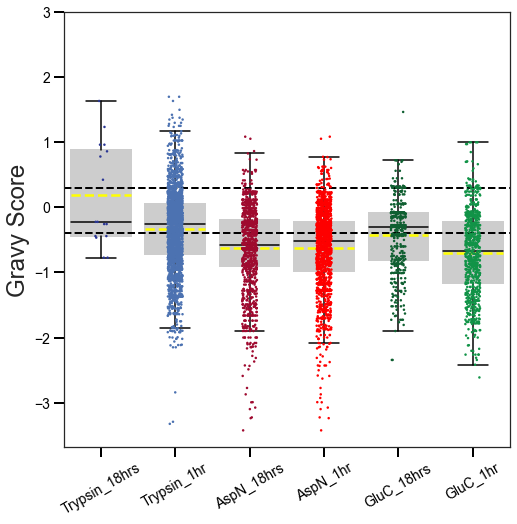

In [208]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("ticks")
meanlineprops = dict(linestyle='--', linewidth=2.5, color='yellow')
boxprops = dict( linestyle='-',linewidth=2, color='#CDCDCD')
plt.tick_params(axis='x', colors='black', length=10, width=2)
plt.tick_params(axis='y', colors='black', length=10, width=2)
sns.stripplot(data=Gravy,palette=colors,s=2.5)
sns.boxplot(data=Gravy,showmeans=True, meanline=True,
            boxprops=boxprops,meanprops=meanlineprops,showfliers=False,color="black")
# plt.title('Sequence Coverage of All Proteins',fontname='Times New Roman',fontweight='bold',fontsize=20,pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.ylabel("Gravy Score",fontsize=24)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(np.arange(-3,4,1),fontsize=14)
plt.axhline(y=0.3, linestyle="--",color='black',linewidth=2)
plt.axhline(y=-0.4, linestyle="--",color='black',linewidth=2)
plt.savefig('MaxPro_Gravy',format=fmt,dpi=dpi,bbox_inches="tight")
plt.show()